In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

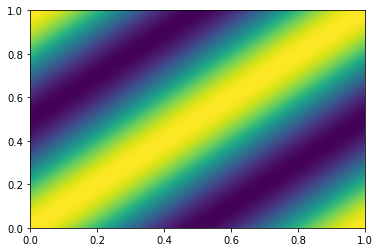

In [13]:
plt.contourf(xmesh, ymesh, out1[0,:,:], levels=128)

In [14]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(sensor1, out1, test_size=0.18, random_state=42)

In [15]:
x_test1.shape

(8, 16, 1)

In [112]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
np.savetxt('x_AF1.csv', sensor1.reshape((41, 16)), delimiter=",")
np.savetxt('y_AF1.csv', out1.reshape((41*101, 101)), delimiter=",")

In [18]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_data, output_img)
sd2 = tf.keras.Model(input_data, output_img)
sd3 = tf.keras.Model(input_data, output_img)

In [19]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 16)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2176      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                             

In [20]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [21]:
start1 = datetime.datetime.now()
history1 = sd1.fit(x_train1, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 9ms/step - loss: 0.5289 - rmse: 0.4937
Epoch 2/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5236 - rmse: 0.4893
Epoch 3/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5188 - rmse: 0.4854
Epoch 4/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5145 - rmse: 0.4819
Epoch 5/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5105 - rmse: 0.4789
Epoch 6/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5065 - rmse: 0.4757
Epoch 7/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.5030 - rmse: 0.4730
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4996 - rmse: 0.4705
Epoch 9/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4963 - rmse: 0.4680
Epoch 10/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4938 - rmse: 0.4664
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 7ms/step - loss: 0.2842 - rmse: 0.3588
Epoch 171/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2831 - rmse: 0.3580
Epoch 172/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2810 - rmse: 0.3558
Epoch 173/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2797 - rmse: 0.3548
Epoch 174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2776 - rmse: 0.3525
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2761 - rmse: 0.3511
Epoch 176/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2749 - rmse: 0.3503
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2747 - rmse: 0.3507
Epoch 178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.2716 - rmse: 0.3471
Epoch 179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2695 - rmse: 0.3448
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0985 - rmse: 0.0912
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0978 - rmse: 0.0888
Epoch 340/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0978 - rmse: 0.0900
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0969 - rmse: 0.0867
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0963 - rmse: 0.0848
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0963 - rmse: 0.0861
Epoch 344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0959 - rmse: 0.0852
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0960 - rmse: 0.0875
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0948 - rmse: 0.0818
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0952 - rmse: 0.0860
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0592 - rmse: 0.0467
Epoch 507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0581 - rmse: 0.0352
Epoch 508/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0580 - rmse: 0.0358
Epoch 509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0573 - rmse: 0.0279
Epoch 510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0570 - rmse: 0.0232
Epoch 511/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0574 - rmse: 0.0329
Epoch 512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0565 - rmse: 0.0201
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0571 - rmse: 0.0327
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0571 - rmse: 0.0353
Epoch 515/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0573 - rmse: 0.0397
Epoch 516/10000
2/2 [========================

2/2 [==============================] - 0s 10ms/step - loss: 0.0393 - rmse: 0.0255
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0393 - rmse: 0.0281
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0399 - rmse: 0.0377
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0392 - rmse: 0.0291
Epoch 678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0392 - rmse: 0.0302
Epoch 679/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0388 - rmse: 0.0249
Epoch 680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0395 - rmse: 0.0366
Epoch 681/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0390 - rmse: 0.0317
Epoch 682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0385 - rmse: 0.0225
Epoch 683/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0392 - rmse: 0.0362
Epoch 684/10000
2/2 [=====================

2/2 [==============================] - 0s 9ms/step - loss: 0.0293 - rmse: 0.0384
Epoch 843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0279 - rmse: 0.0120
Epoch 844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0300 - rmse: 0.0476
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.0167
Epoch 846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0279 - rmse: 0.0160
Epoch 847/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0279 - rmse: 0.0175
Epoch 848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0284 - rmse: 0.0292
Epoch 849/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0280 - rmse: 0.0241
Epoch 850/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0279 - rmse: 0.0223
Epoch 851/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0284 - rmse: 0.0318
Epoch 852/10000
2/2 [=====================

2/2 [==============================] - 0s 9ms/step - loss: 0.0215 - rmse: 0.0142
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0222 - rmse: 0.0305
Epoch 1012/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0215 - rmse: 0.0160
Epoch 1013/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0216 - rmse: 0.0191
Epoch 1014/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0216 - rmse: 0.0212
Epoch 1015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0217 - rmse: 0.0245
Epoch 1016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0214 - rmse: 0.0181
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0221 - rmse: 0.0321
Epoch 1018/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0216 - rmse: 0.0237
Epoch 1019/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0216 - rmse: 0.0238
Epoch 1020/10000
2/2 [============

2/2 [==============================] - 0s 9ms/step - loss: 0.0175 - rmse: 0.0240
Epoch 1177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0174 - rmse: 0.0215
Epoch 1178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0181 - rmse: 0.0351
Epoch 1179/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0175 - rmse: 0.0247
Epoch 1180/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0174 - rmse: 0.0231
Epoch 1181/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0189 - rmse: 0.0457
Epoch 1182/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0180 - rmse: 0.0348
Epoch 1183/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0171 - rmse: 0.0178
Epoch 1184/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0186 - rmse: 0.0429
Epoch 1185/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0171 - rmse: 0.0188
Epoch 1186/10000
2/2 [==========

2/2 [==============================] - 0s 9ms/step - loss: 0.0139 - rmse: 0.0104
Epoch 1343/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0147 - rmse: 0.0316
Epoch 1344/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0141 - rmse: 0.0183
Epoch 1345/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0151 - rmse: 0.0374
Epoch 1346/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0140 - rmse: 0.0174
Epoch 1347/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0146 - rmse: 0.0303
Epoch 1348/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0139 - rmse: 0.0151
Epoch 1349/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0142 - rmse: 0.0244
Epoch 1350/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0141 - rmse: 0.0224
Epoch 1351/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0141 - rmse: 0.0223
Epoch 1352/10000
2/2 [=======

2/2 [==============================] - 0s 16ms/step - loss: 0.0116 - rmse: 0.0165
Epoch 1509/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0117 - rmse: 0.0210
Epoch 1510/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0115 - rmse: 0.0139
Epoch 1511/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0117 - rmse: 0.0205
Epoch 1512/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0124 - rmse: 0.0333
Epoch 1513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0117 - rmse: 0.0217
Epoch 1514/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0121 - rmse: 0.0289
Epoch 1515/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0129 - rmse: 0.0412
Epoch 1516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0113 - rmse: 0.0081
Epoch 1517/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0115 - rmse: 0.0174
Epoch 1518/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0103 - rmse: 0.0322
Epoch 1675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0404
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0263
Epoch 1677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0094 - rmse: 0.0118
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0195
Epoch 1679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0101 - rmse: 0.0298
Epoch 1680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0097 - rmse: 0.0217
Epoch 1681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0102 - rmse: 0.0318
Epoch 1682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0196
Epoch 1683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0097 - rmse: 0.0230
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0117
Epoch 1841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0221
Epoch 1842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0195
Epoch 1843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0177
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0208
Epoch 1845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0137
Epoch 1846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0115
Epoch 1847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0079 - rmse: 0.0172
Epoch 1848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0189
Epoch 1849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0239
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0247
Epoch 2007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0064 - rmse: 0.0100
Epoch 2008/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0222
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0346
Epoch 2010/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0171
Epoch 2011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0104
Epoch 2012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0153
Epoch 2013/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0204
Epoch 2014/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0458
Epoch 2015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0072 - rmse: 0.0311
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0225
Epoch 2173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0176
Epoch 2174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0349
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0260
Epoch 2176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0153
Epoch 2177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0174
Epoch 2178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0263
Epoch 2179/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0224
Epoch 2180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0235
Epoch 2181/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0167
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0274
Epoch 2339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0223
Epoch 2340/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0143
Epoch 2341/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0477
Epoch 2342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0224
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0201
Epoch 2344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0137
Epoch 2345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - rmse: 0.0289
Epoch 2346/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0223
Epoch 2347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0190
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 17ms/step - loss: 0.0056 - rmse: 0.0467
Epoch 2505/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0055 - rmse: 0.0456
Epoch 2506/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0036 - rmse: 0.0115
Epoch 2507/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0046 - rmse: 0.0347
Epoch 2508/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0046 - rmse: 0.0337
Epoch 2509/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0276
Epoch 2510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0051 - rmse: 0.0410
Epoch 2511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0266
Epoch 2512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0288
Epoch 2513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 2514/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0265
Epoch 2671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0433
Epoch 2672/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0207
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0090
Epoch 2674/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0435
Epoch 2675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0259
Epoch 2676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0131
Epoch 2677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0306
Epoch 2678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0229
Epoch 2679/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0227
Epoch 2680/10000
2/2 [============

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0269
Epoch 2837/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0154
Epoch 2838/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0257
Epoch 2839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0317
Epoch 2840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0192
Epoch 2841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0178
Epoch 2842/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0195
Epoch 2843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0037 - rmse: 0.0376
Epoch 2844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0239
Epoch 2845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0119
Epoch 2846/10000
2/2 [=============

2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0183
Epoch 3003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0103
Epoch 3004/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0284
Epoch 3005/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0210
Epoch 3006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0205
Epoch 3007/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0170
Epoch 3008/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0296
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0144
Epoch 3010/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0201
Epoch 3011/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0105
Epoch 3012/10000
2/2 [=============

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0208
Epoch 3169/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0108
Epoch 3170/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0118
Epoch 3171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0216
Epoch 3172/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0107
Epoch 3173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0463
Epoch 3174/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0221
Epoch 3175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0169
Epoch 3176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0222
Epoch 3177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0204
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0205
Epoch 3335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0291
Epoch 3336/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0209
Epoch 3337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0392
Epoch 3338/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0216
Epoch 3339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0354
Epoch 3340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0241
Epoch 3341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0344
Epoch 3342/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0023 - rmse: 0.0338
Epoch 3343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0160
Epoch 3344/10000
2/2 [=============

2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0181
Epoch 3501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0109
Epoch 3502/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0071
Epoch 3503/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0183
Epoch 3504/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0220
Epoch 3505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0117
Epoch 3506/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0277
Epoch 3507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0072
Epoch 3508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0319
Epoch 3509/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9837e-04 - rmse: 0.0055
Epoch 3510/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0419
Epoch 3667/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9986e-04 - rmse: 0.0143
Epoch 3668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0216
Epoch 3669/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0269
Epoch 3670/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6768e-04 - rmse: 0.0087
Epoch 3671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0175
Epoch 3672/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0312
Epoch 3673/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0301
Epoch 3674/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0397
Epoch 3675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0154
Epoch 3676/10000
2/2 [======

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0398
Epoch 3831/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0417e-04 - rmse: 0.0073
Epoch 3832/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0327
Epoch 3833/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0291
Epoch 3834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0247
Epoch 3835/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0426
Epoch 3836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0424
Epoch 3837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0295
Epoch 3838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0257
Epoch 3839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0245
Epoch 3840/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0303
Epoch 3994/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0263
Epoch 3995/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0333
Epoch 3996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0263
Epoch 3997/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4103e-04 - rmse: 0.0202
Epoch 3998/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0320
Epoch 3999/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3305e-04 - rmse: 0.0201
Epoch 4000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0364
Epoch 4001/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0232
Epoch 4002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0408
Epoch 4003/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 5.5038e-04 - rmse: 0.0106
Epoch 4157/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7603e-04 - rmse: 0.0209
Epoch 4158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0311
Epoch 4159/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6607e-04 - rmse: 0.0113
Epoch 4160/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8924e-04 - rmse: 0.0072
Epoch 4161/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0067e-04 - rmse: 0.0163
Epoch 4162/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0278
Epoch 4163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0424
Epoch 4164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0316
Epoch 4165/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.7869e-04 - rmse: 0.0156
Epoch 4166/10

Epoch 4319/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9243e-04 - rmse: 0.0114
Epoch 4320/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1597e-04 - rmse: 0.0236
Epoch 4321/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0322
Epoch 4322/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0258
Epoch 4323/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0320
Epoch 4324/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5986e-04 - rmse: 0.0245
Epoch 4325/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0262
Epoch 4326/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4728e-04 - rmse: 0.0094
Epoch 4327/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0302e-04 - rmse: 0.0156
Epoch 4328/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0280

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0339
Epoch 4482/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0383
Epoch 4483/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0432
Epoch 4484/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.0694e-04 - rmse: 0.0176
Epoch 4485/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9119e-04 - rmse: 0.0097
Epoch 4486/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 4487/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4306e-04 - rmse: 0.0254
Epoch 4488/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0267
Epoch 4489/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9806e-04 - rmse: 0.0101
Epoch 4490/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3393e-04 - rmse: 0.0209
Epoch 4491/10000


2/2 [==============================] - 0s 9ms/step - loss: 4.1327e-04 - rmse: 0.0119
Epoch 4563/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8440e-04 - rmse: 0.0248
Epoch 4564/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.1394e-04 - rmse: 0.0119
Epoch 4565/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0325
Epoch 4566/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0302
Epoch 4567/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5784e-04 - rmse: 0.0094
Epoch 4568/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9035e-04 - rmse: 0.0268
Epoch 4569/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3142e-04 - rmse: 0.0237
Epoch 4570/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 4571/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7840e-04 - rmse: 0.0145
Epoch 457

2/2 [==============================] - 0s 9ms/step - loss: 9.0770e-04 - rmse: 0.0261
Epoch 4725/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1786e-04 - rmse: 0.0171
Epoch 4726/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2933e-04 - rmse: 0.0224
Epoch 4727/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6321e-04 - rmse: 0.0117
Epoch 4728/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1537e-04 - rmse: 0.0198
Epoch 4729/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4303e-04 - rmse: 0.0109
Epoch 4730/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0934e-04 - rmse: 0.0136
Epoch 4731/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0455e-04 - rmse: 0.0134
Epoch 4732/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 4733/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1528e-04 - rmse: 0.0222
E

2/2 [==============================] - 0s 9ms/step - loss: 4.6092e-04 - rmse: 0.0165
Epoch 4887/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2061e-04 - rmse: 0.0183
Epoch 4888/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2850e-04 - rmse: 0.0155
Epoch 4889/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8180e-04 - rmse: 0.0199
Epoch 4890/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4122e-04 - rmse: 0.0236
Epoch 4891/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.3222e-04 - rmse: 0.0121
Epoch 4892/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0306
Epoch 4893/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2859e-04 - rmse: 0.0119
Epoch 4894/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5538e-04 - rmse: 0.0130
Epoch 4895/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4320e-04 - rmse: 0.0161
E

2/2 [==============================] - 0s 7ms/step - loss: 5.6225e-04 - rmse: 0.0202
Epoch 5049/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0392
Epoch 5050/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0391
Epoch 5051/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1796e-04 - rmse: 0.0080
Epoch 5052/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0424
Epoch 5053/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8288e-04 - rmse: 0.0114
Epoch 5054/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.9470e-04 - rmse: 0.0210
Epoch 5055/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0614e-04 - rmse: 0.0159
Epoch 5056/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.8961e-04 - rmse: 0.0154
Epoch 5057/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.9646e-04 - rmse: 0.0254
Ep

2/2 [==============================] - 0s 9ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 5211/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.5501e-04 - rmse: 0.0288
Epoch 5212/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1521e-04 - rmse: 0.0137
Epoch 5213/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.5786e-04 - rmse: 0.0182
Epoch 5214/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8752e-04 - rmse: 0.0237
Epoch 5215/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2680e-04 - rmse: 0.0141
Epoch 5216/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8404e-04 - rmse: 0.0256
Epoch 5217/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0252e-04 - rmse: 0.0194
Epoch 5218/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9694e-04 - rmse: 0.0130
Epoch 5219/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4527e-04 - rmse: 0.0249


2/2 [==============================] - 0s 8ms/step - loss: 8.2796e-04 - rmse: 0.0269
Epoch 5373/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 5374/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.7535e-04 - rmse: 0.0130
Epoch 5375/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.8707e-04 - rmse: 0.0195
Epoch 5376/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6299e-04 - rmse: 0.0236
Epoch 5377/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3346e-04 - rmse: 0.0270
Epoch 5378/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9095e-04 - rmse: 0.0136
Epoch 5379/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0407
Epoch 5380/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.2280e-04 - rmse: 0.0268
Epoch 5381/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9503e-04 - rmse: 0.0263
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 4.9843e-04 - rmse: 0.0200
Epoch 5454/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0310
Epoch 5455/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2111e-04 - rmse: 0.0206
Epoch 5456/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7786e-04 - rmse: 0.0090
Epoch 5457/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2196e-04 - rmse: 0.0250
Epoch 5458/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3153e-04 - rmse: 0.0183
Epoch 5459/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2455e-04 - rmse: 0.0181
Epoch 5460/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1105e-04 - rmse: 0.0227
Epoch 5461/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7462e-04 - rmse: 0.0194
Epoch 5462/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0393
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 7.2776e-04 - rmse: 0.0253
Epoch 5535/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2487e-04 - rmse: 0.0289
Epoch 5536/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2966e-04 - rmse: 0.0233
Epoch 5537/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4052e-04 - rmse: 0.0292
Epoch 5538/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 5539/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 5540/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3362e-04 - rmse: 0.0254
Epoch 5541/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 5542/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9598e-04 - rmse: 0.0284
Epoch 5543/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3518e-04 - rmse: 0.0186
Epoch 554

2/2 [==============================] - 0s 7ms/step - loss: 2.0654e-04 - rmse: 0.0115
Epoch 5697/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 5698/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 5699/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 5700/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 5701/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 5702/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.0288e-04 - rmse: 0.0270
Epoch 5703/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1207e-04 - rmse: 0.0118
Epoch 5704/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5288e-04 - rmse: 0.0089
Epoch 5705/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9370e-04 - rmse: 0.0179
Epoch 5706/10000


2/2 [==============================] - 0s 7ms/step - loss: 3.7622e-04 - rmse: 0.0178
Epoch 5859/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3452e-04 - rmse: 0.0132
Epoch 5860/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8769e-04 - rmse: 0.0151
Epoch 5861/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1319e-04 - rmse: 0.0072
Epoch 5862/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1179e-04 - rmse: 0.0212
Epoch 5863/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3912e-04 - rmse: 0.0167
Epoch 5864/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8603e-04 - rmse: 0.0150
Epoch 5865/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5114e-04 - rmse: 0.0281
Epoch 5866/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1283e-04 - rmse: 0.0292
Epoch 5867/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1189e-04 - rmse: 0.00

2/2 [==============================] - 0s 9ms/step - loss: 2.6205e-04 - rmse: 0.0144
Epoch 5940/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4924e-04 - rmse: 0.0171
Epoch 5941/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2453e-04 - rmse: 0.0130
Epoch 5942/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 5943/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 5944/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 5945/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1565e-04 - rmse: 0.0127
Epoch 5946/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8312e-04 - rmse: 0.0113
Epoch 5947/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1909e-04 - rmse: 0.0163
Epoch 5948/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7381e-04 - rmse: 0.0109
Epoch 594

Epoch 6101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 6102/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 6103/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 6104/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9551e-04 - rmse: 0.0234
Epoch 6105/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.7254e-05 - rmse: 0.0072
Epoch 6106/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.7675e-04 - rmse: 0.0288
Epoch 6107/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8146e-04 - rmse: 0.0252
Epoch 6108/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2715e-04 - rmse: 0.0297
Epoch 6109/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5545e-04 - rmse: 0.0247
Epoch 6110/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9586e-04 - rms

2/2 [==============================] - 0s 9ms/step - loss: 6.8975e-05 - rmse: 0.0055
Epoch 6263/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1569e-05 - rmse: 0.0048
Epoch 6264/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7004e-04 - rmse: 0.0182
Epoch 6265/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1440e-04 - rmse: 0.0133
Epoch 6266/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8349e-05 - rmse: 0.0063
Epoch 6267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 6268/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6890e-04 - rmse: 0.0114
Epoch 6269/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1242e-04 - rmse: 0.0218
Epoch 6270/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 6271/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5578e-04 - rmse: 0.0109
Epo

2/2 [==============================] - 0s 9ms/step - loss: 9.3711e-04 - rmse: 0.0300
Epoch 6344/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.9802e-04 - rmse: 0.0310
Epoch 6345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 6346/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4434e-04 - rmse: 0.0285
Epoch 6347/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8988e-04 - rmse: 0.0188
Epoch 6348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 6349/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8343e-04 - rmse: 0.0308
Epoch 6350/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0741e-04 - rmse: 0.0295
Epoch 6351/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6345e-04 - rmse: 0.0114
Epoch 6352/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.2607e-04 - rmse: 0.0198
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 6425/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2455e-04 - rmse: 0.0222
Epoch 6426/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1366e-04 - rmse: 0.0195
Epoch 6427/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5961e-04 - rmse: 0.0113
Epoch 6428/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.2269e-04 - rmse: 0.0222
Epoch 6429/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7888e-04 - rmse: 0.0273
Epoch 6430/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1024e-04 - rmse: 0.0134
Epoch 6431/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7455e-04 - rmse: 0.0273
Epoch 6432/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5809e-04 - rmse: 0.0207
Epoch 6433/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0379
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 6.0982e-05 - rmse: 0.0059
Epoch 6585/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0531e-04 - rmse: 0.0167
Epoch 6586/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3412e-04 - rmse: 0.0104
Epoch 6587/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4308e-04 - rmse: 0.0268
Epoch 6588/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1856e-05 - rmse: 0.0081
Epoch 6589/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3974e-05 - rmse: 0.0076
Epoch 6590/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2521e-04 - rmse: 0.0141
Epoch 6591/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7222e-05 - rmse: 0.0078
Epoch 6592/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9725e-04 - rmse: 0.0165
Epoch 6593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0425
E

2/2 [==============================] - 0s 7ms/step - loss: 8.8126e-05 - rmse: 0.0082
Epoch 6746/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1502e-04 - rmse: 0.0222
Epoch 6747/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7782e-04 - rmse: 0.0236
Epoch 6748/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0020e-04 - rmse: 0.0195
Epoch 6749/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5966e-04 - rmse: 0.0154
Epoch 6750/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1862e-04 - rmse: 0.0099
Epoch 6751/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 6752/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 6753/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3448e-04 - rmse: 0.0177
Epoch 6754/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8426e-04 - rmse: 0.0276
Epoch

2/2 [==============================] - 0s 7ms/step - loss: 6.5209e-04 - rmse: 0.0252
Epoch 6907/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1805e-05 - rmse: 0.0080
Epoch 6908/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.4956e-04 - rmse: 0.0305
Epoch 6909/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8386e-04 - rmse: 0.0163
Epoch 6910/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4788e-05 - rmse: 0.0041
Epoch 6911/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8431e-04 - rmse: 0.0129
Epoch 6912/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2039e-04 - rmse: 0.0265
Epoch 6913/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 6914/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0362
Epoch 6915/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.8860e-04 - rmse: 0.0131
Epoch

2/2 [==============================] - 0s 12ms/step - loss: 4.3397e-04 - rmse: 0.0204
Epoch 6988/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7097e-04 - rmse: 0.0160
Epoch 6989/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.2887e-05 - rmse: 0.0087
Epoch 6990/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7655e-04 - rmse: 0.0215
Epoch 6991/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9716e-05 - rmse: 0.0066
Epoch 6992/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8714e-05 - rmse: 0.0047
Epoch 6993/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.8050e-05 - rmse: 0.0090
Epoch 6994/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3912e-04 - rmse: 0.0149
Epoch 6995/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 6996/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0422

2/2 [==============================] - 0s 8ms/step - loss: 6.0356e-04 - rmse: 0.0243
Epoch 7069/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2395e-04 - rmse: 0.0176
Epoch 7070/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.3065e-04 - rmse: 0.0204
Epoch 7071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 7072/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.1801e-04 - rmse: 0.0246
Epoch 7073/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4490e-04 - rmse: 0.0207
Epoch 7074/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 7075/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3637e-04 - rmse: 0.0249
Epoch 7076/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2413e-04 - rmse: 0.0247
Epoch 7077/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9967e-04 - rmse: 0.0297
Epoch

2/2 [==============================] - 0s 9ms/step - loss: 2.9344e-04 - rmse: 0.0167
Epoch 7150/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8745e-05 - rmse: 0.0050
Epoch 7151/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4733e-04 - rmse: 0.0183
Epoch 7152/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.1673e-04 - rmse: 0.0102
Epoch 7153/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1996e-04 - rmse: 0.0225
Epoch 7154/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3157e-04 - rmse: 0.0178
Epoch 7155/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1551e-04 - rmse: 0.0265
Epoch 7156/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.9431e-04 - rmse: 0.0279
Epoch 7157/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8467e-04 - rmse: 0.0278
Epoch 7158/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
E

2/2 [==============================] - 0s 7ms/step - loss: 8.8841e-04 - rmse: 0.0296
Epoch 7231/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8743e-05 - rmse: 0.0087
Epoch 7232/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8522e-04 - rmse: 0.0259
Epoch 7233/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4629e-04 - rmse: 0.0208
Epoch 7234/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.0097e-04 - rmse: 0.0137
Epoch 7235/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7297e-04 - rmse: 0.0161
Epoch 7236/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6892e-04 - rmse: 0.0256
Epoch 7237/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4814e-04 - rmse: 0.0183
Epoch 7238/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8386e-04 - rmse: 0.0165
Epoch 7239/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6675e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 9.7773e-05 - rmse: 0.0093
Epoch 7391/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3663e-04 - rmse: 0.0229
Epoch 7392/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0368   
Epoch 7393/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0322
Epoch 7394/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6865e-04 - rmse: 0.0161
Epoch 7395/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.4001e-04 - rmse: 0.0288
Epoch 7396/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.0621e-04 - rmse: 0.0098
Epoch 7397/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.3148e-04 - rmse: 0.0179
Epoch 7398/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.9213e-05 - rmse: 0.0076
Epoch 7399/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.8663e-04 - rmse: 

2/2 [==============================] - 0s 9ms/step - loss: 4.5477e-04 - rmse: 0.0211
Epoch 7552/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.5760e-04 - rmse: 0.0255
Epoch 7553/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.9020e-04 - rmse: 0.0241
Epoch 7554/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 7555/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3706e-04 - rmse: 0.0151
Epoch 7556/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4181e-05 - rmse: 0.0050
Epoch 7557/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 7558/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7378e-04 - rmse: 0.0258
Epoch 7559/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.7300e-04 - rmse: 0.0215
Epoch 7560/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3937e-04 - rmse: 0.0230
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7713/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 7714/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3285e-04 - rmse: 0.0287
Epoch 7715/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6849e-04 - rmse: 0.0161
Epoch 7716/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1081e-04 - rmse: 0.0201
Epoch 7717/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 7718/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7451e-05 - rmse: 0.0083
Epoch 7719/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0670e-04 - rmse: 0.0141
Epoch 7720/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7351e-04 - rmse: 0.0163
Epoch 7721/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.1462e-04 - rmse: 0.0284
Epoch 772

2/2 [==============================] - 0s 7ms/step - loss: 2.2643e-04 - rmse: 0.0148
Epoch 7873/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7874/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 7875/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 7876/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5525e-04 - rmse: 0.0187
Epoch 7877/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2173e-04 - rmse: 0.0267
Epoch 7878/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 7879/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.6715e-04 - rmse: 0.0293
Epoch 7880/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.3871e-04 - rmse: 0.0230
Epoch 7881/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9205e-04 - rmse: 0.0297
Epoch 7882/10

2/2 [==============================] - 0s 8ms/step - loss: 2.8336e-04 - rmse: 0.0166
Epoch 8035/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6029e-05 - rmse: 0.0070
Epoch 8036/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.1926e-05 - rmse: 0.0067
Epoch 8037/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.3116e-04 - rmse: 0.0304
Epoch 8038/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8008e-05 - rmse: 0.0064
Epoch 8039/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4362e-04 - rmse: 0.0209
Epoch 8040/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7368e-04 - rmse: 0.0163
Epoch 8041/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1499e-04 - rmse: 0.0202
Epoch 8042/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7578e-04 - rmse: 0.0130
Epoch 8043/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3891e-04 - rmse: 0.02

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 8116/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6300e-04 - rmse: 0.0125
Epoch 8117/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8118/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0846e-04 - rmse: 0.0283
Epoch 8119/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5813e-04 - rmse: 0.0159
Epoch 8120/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8121/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4315e-04 - rmse: 0.0209
Epoch 8122/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5115e-04 - rmse: 0.0211
Epoch 8123/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 8124/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8125/10000


2/2 [==============================] - 0s 7ms/step - loss: 7.4405e-04 - rmse: 0.0272
Epoch 8278/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6856e-04 - rmse: 0.0294
Epoch 8279/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0769e-04 - rmse: 0.0265
Epoch 8280/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6253e-04 - rmse: 0.0236
Epoch 8281/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3818e-05 - rmse: 0.0076
Epoch 8282/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.0864e-04 - rmse: 0.0283
Epoch 8283/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.5235e-04 - rmse: 0.0308
Epoch 8284/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.3267e-04 - rmse: 0.0270
Epoch 8285/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.1327e-04 - rmse: 0.0104
Epoch 8286/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2478e-04 - rmse: 0.02

2/2 [==============================] - 0s 12ms/step - loss: 8.5330e-04 - rmse: 0.0291
Epoch 8359/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.4797e-04 - rmse: 0.0307
Epoch 8360/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 8361/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9797e-05 - rmse: 0.0066
Epoch 8362/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 8363/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3888e-04 - rmse: 0.0252
Epoch 8364/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7523e-04 - rmse: 0.0277
Epoch 8365/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.3658e-04 - rmse: 0.0152
Epoch 8366/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.4236e-04 - rmse: 0.0306
Epoch 8367/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5546e-04 - rmse: 0.0158
Ep

2/2 [==============================] - 0s 7ms/step - loss: 2.3434e-05 - rmse: 0.0042
Epoch 8519/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4890e-05 - rmse: 0.0063
Epoch 8520/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1970e-04 - rmse: 0.0146
Epoch 8521/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.3848e-04 - rmse: 0.0208
Epoch 8522/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4141e-04 - rmse: 0.0306
Epoch 8523/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.7645e-05 - rmse: 0.0085
Epoch 8524/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7036e-04 - rmse: 0.0238
Epoch 8525/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2265e-04 - rmse: 0.0147
Epoch 8526/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2236e-04 - rmse: 0.0147
Epoch 8527/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6946e-04 - rmse: 0.02

Epoch 8679/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.8128e-04 - rmse: 0.0279
Epoch 8680/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4411e-04 - rmse: 0.0155
Epoch 8681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 8682/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8552e-04 - rmse: 0.0134
Epoch 8683/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2873e-04 - rmse: 0.0269
Epoch 8684/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.2340e-04 - rmse: 0.0205
Epoch 8685/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3981e-04 - rmse: 0.0252
Epoch 8686/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1010e-04 - rmse: 0.0265
Epoch 8687/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3202e-04 - rmse: 0.0304
Epoch 8688/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6831e-04

2/2 [==============================] - 0s 8ms/step - loss: 1.0322e-04 - rmse: 0.0099
Epoch 8841/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3380e-04 - rmse: 0.0207
Epoch 8842/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6295e-05 - rmse: 0.0064
Epoch 8843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 8844/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7516e-05 - rmse: 0.0048
Epoch 8845/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2185e-04 - rmse: 0.0108
Epoch 8846/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.1931e-05 - rmse: 0.0093
Epoch 8847/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.5107e-04 - rmse: 0.0254
Epoch 8848/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1327e-04 - rmse: 0.0202
Epoch 8849/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2121e-05 - rmse: 0.0027
E

2/2 [==============================] - 0s 7ms/step - loss: 6.4725e-04 - rmse: 0.0253
Epoch 9002/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.9471e-04 - rmse: 0.0263
Epoch 9003/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.8854e-04 - rmse: 0.0297
Epoch 9004/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.1511e-04 - rmse: 0.0285
Epoch 9005/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 9006/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.5636e-04 - rmse: 0.0213
Epoch 9007/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.9822e-05 - rmse: 0.0050
Epoch 9008/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 9009/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7616e-05 - rmse: 0.0091
Epoch 9010/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4722e-04 - rmse: 0.0185
Epoch

2/2 [==============================] - 0s 8ms/step - loss: 6.3886e-04 - rmse: 0.0252
Epoch 9163/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.0193e-04 - rmse: 0.0223
Epoch 9164/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9966e-04 - rmse: 0.0223
Epoch 9165/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.4341e-04 - rmse: 0.0290
Epoch 9166/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1661e-04 - rmse: 0.0146
Epoch 9167/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6152e-05 - rmse: 0.0046
Epoch 9168/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1485e-04 - rmse: 0.0203
Epoch 9169/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8786e-04 - rmse: 0.0280
Epoch 9170/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2831e-04 - rmse: 0.0150
Epoch 9171/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4122e-04 - rmse: 0.02

2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9324/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9325/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.3395e-04 - rmse: 0.0305
Epoch 9326/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8275e-04 - rmse: 0.0195
Epoch 9327/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3879e-05 - rmse: 0.0031
Epoch 9328/10000
2/2 [==============================] - 0s 6ms/step - loss: 3.0345e-05 - rmse: 0.0051
Epoch 9329/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5789e-04 - rmse: 0.0292
Epoch 9330/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9693e-05 - rmse: 0.0067
Epoch 9331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 9332/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.8240e-04 - rmse: 0.0167
Epoch 933

Epoch 9484/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 9485/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0446e-04 - rmse: 0.0200
Epoch 9486/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.0256e-04 - rmse: 0.0283
Epoch 9487/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6545e-04 - rmse: 0.0127
Epoch 9488/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4293e-04 - rmse: 0.0232
Epoch 9489/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8797e-04 - rmse: 0.0196
Epoch 9490/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.3218e-04 - rmse: 0.0270
Epoch 9491/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2343e-04 - rmse: 0.0109
Epoch 9492/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0063e-04 - rmse: 0.0264
Epoch 9493/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8607e-05

2/2 [==============================] - 0s 13ms/step - loss: 4.1427e-04 - rmse: 0.0202
Epoch 9646/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.0431e-04 - rmse: 0.0173
Epoch 9647/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9648/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 9649/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 9650/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4754e-04 - rmse: 0.0253
Epoch 9651/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 9652/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.1683e-04 - rmse: 0.0247
Epoch 9653/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0886e-05 - rmse: 0.0092
Epoch 9654/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.8146e-04 - rmse: 0.0132
Epoch 

2/2 [==============================] - 0s 7ms/step - loss: 5.7592e-04 - rmse: 0.0239
Epoch 9727/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9093e-05 - rmse: 0.0038
Epoch 9728/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.0830e-05 - rmse: 0.0051
Epoch 9729/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 9730/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0559e-04 - rmse: 0.0265
Epoch 9731/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3065e-04 - rmse: 0.0250
Epoch 9732/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6008e-04 - rmse: 0.0236
Epoch 9733/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.4309e-04 - rmse: 0.0253
Epoch 9734/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4799e-04 - rmse: 0.0290
Epoch 9735/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.9140e-04 - rmse: 0.0281
E

2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 9887/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4435e-04 - rmse: 0.0307
Epoch 9888/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.7245e-04 - rmse: 0.0130
Epoch 9889/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3025e-04 - rmse: 0.0304
Epoch 9890/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5399e-04 - rmse: 0.0292
Epoch 9891/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 9892/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1210e-04 - rmse: 0.0225
Epoch 9893/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 9894/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 9895/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6851e-04 - rmse: 0.0163
Epoch 9896/10

In [22]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:03:01.077202


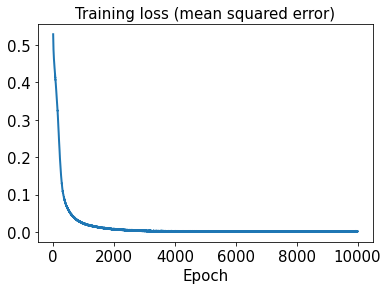

In [23]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

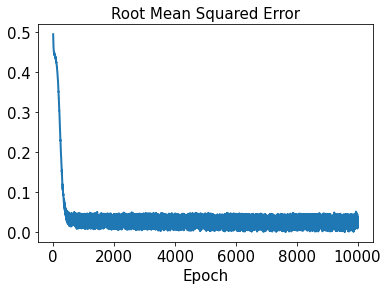

In [24]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [25]:
test_results1 = sd1.evaluate(x_test1)

1/1 [==============================] - 0s 114ms/step - loss: 3.7274e-06 - rmse: 0.0000e+00


In [26]:
decoded_train1 = sd1.predict(x_train1)

In [28]:
decoded_test1 = sd1.predict(x_test1)

In [29]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [30]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [31]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.004032419213401631


In [32]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.0035067296690225722


In [33]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.0063011157261881785, 0.00275883731274459, 0.005177473575486731, 0.0023713403554480534, 0.0027892820280434843, 0.002473857501665929, 0.0025300730049711206, 0.007551050928142102, 0.0026450725977398473, 0.008452658927066694, 0.008168514644383498, 0.0035685394753184295, 0.00553758777968147, 0.002879166066502287, 0.002379302332223355, 0.003424189572293323, 0.006704019186589308, 0.003620509388742334, 0.0032818123690879506, 0.007120554776936563, 0.008437515054515697, 0.0031425066830194845, 0.008746154735595129, 0.004190755943840854, 0.007893651594557247, 0.0024145213756393163, 0.0038959839849624376, 0.0029607760993578237, 0.003377143592395453, 0.0026492425735952173, 0.002445854249668017, 0.005912289500448932, 0.004579921088569444]


In [34]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.004503271589871833, 0.0023930462970443494, 0.002553175629955583, 0.0048325287644263365, 0.0030077316800566846, 0.007623550320146983, 0.003157460361084983, 0.002432112784106408]


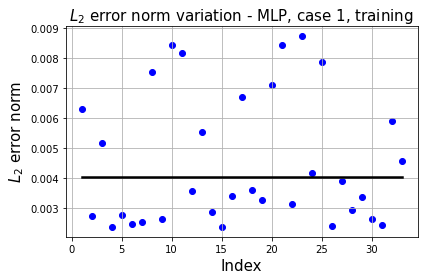

In [35]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP, case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

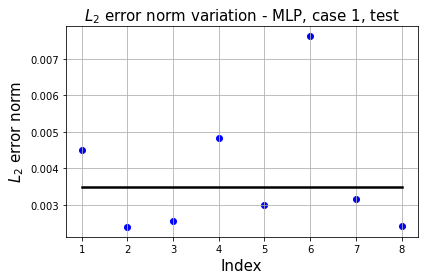

In [36]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP, case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

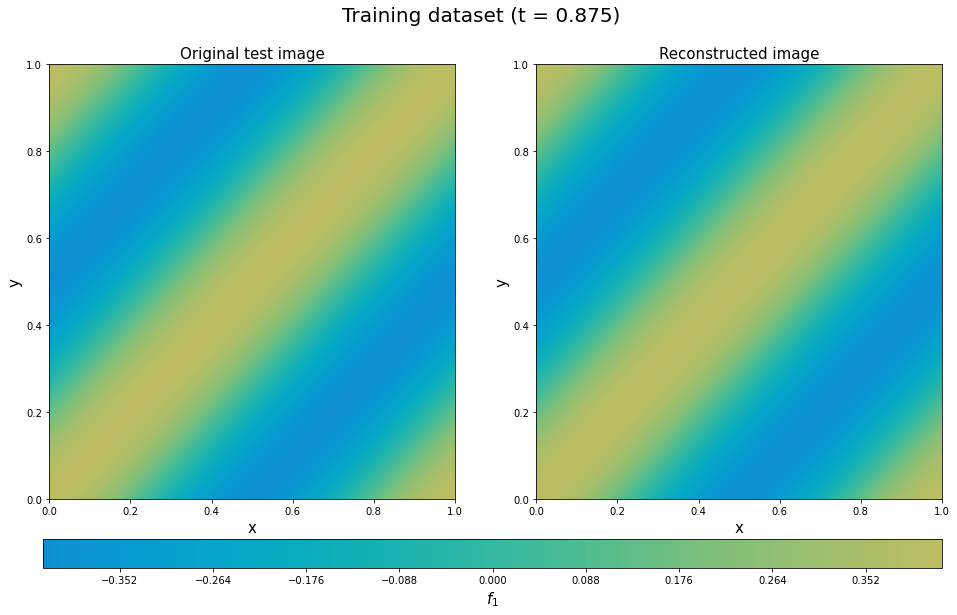

In [143]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

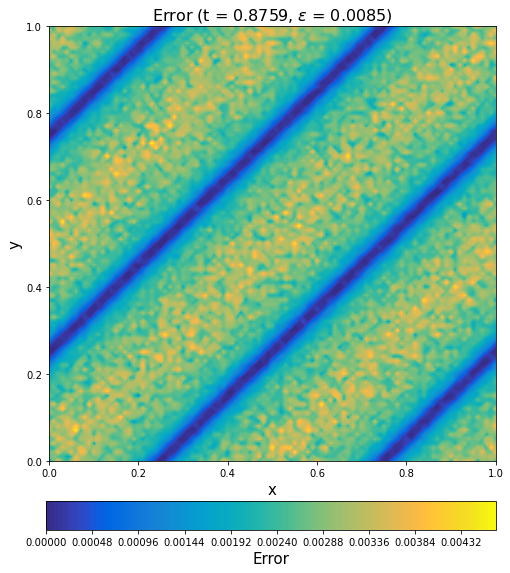

In [114]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

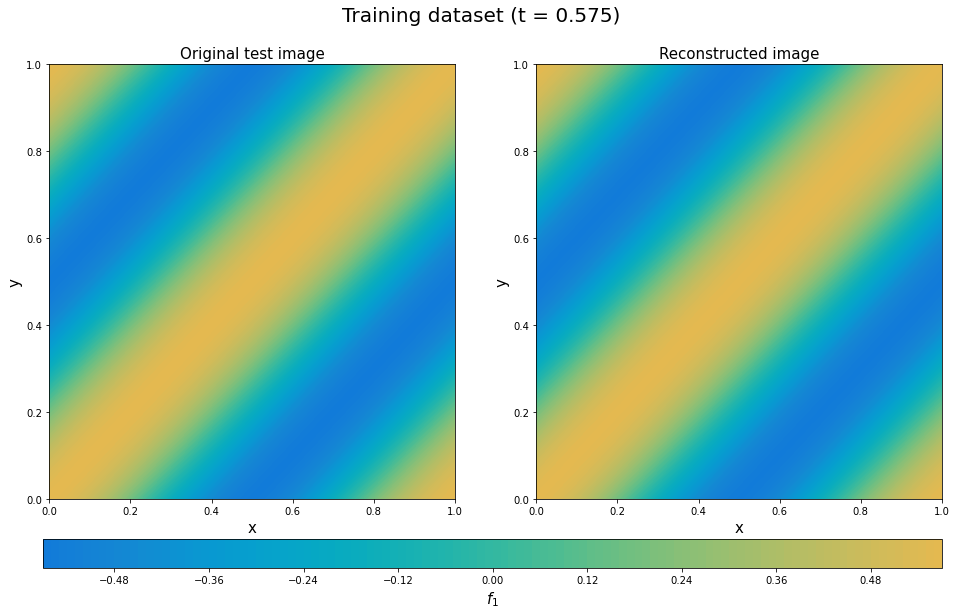

In [142]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

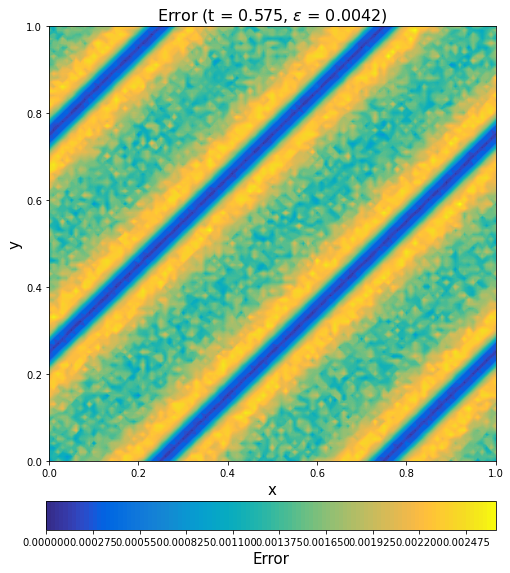

In [118]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

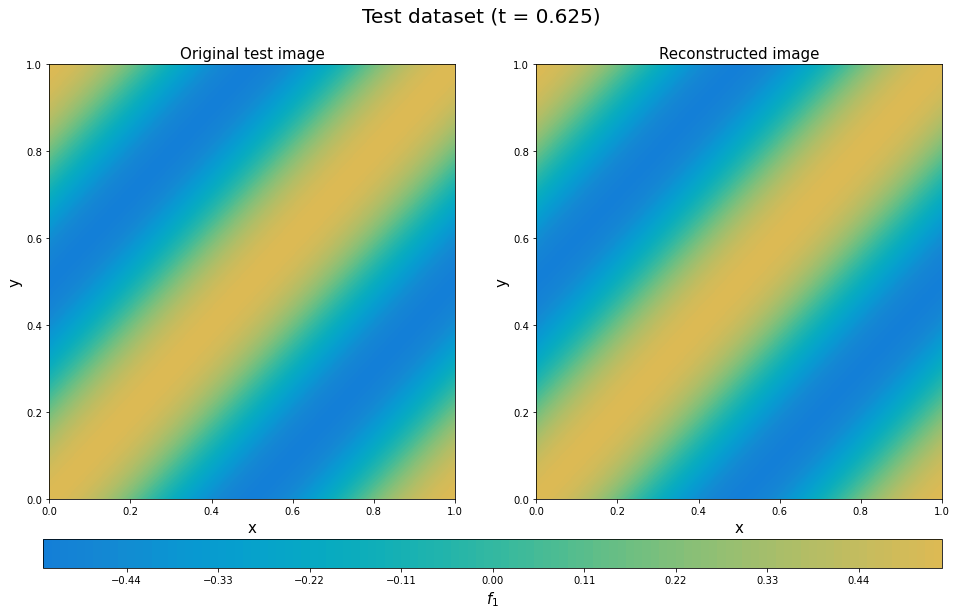

In [141]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

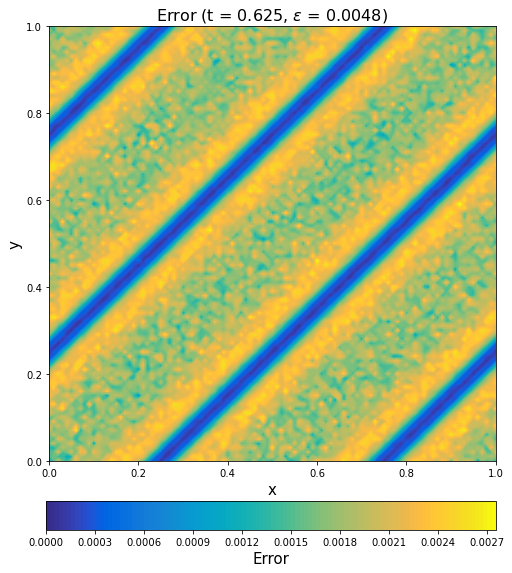

In [120]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

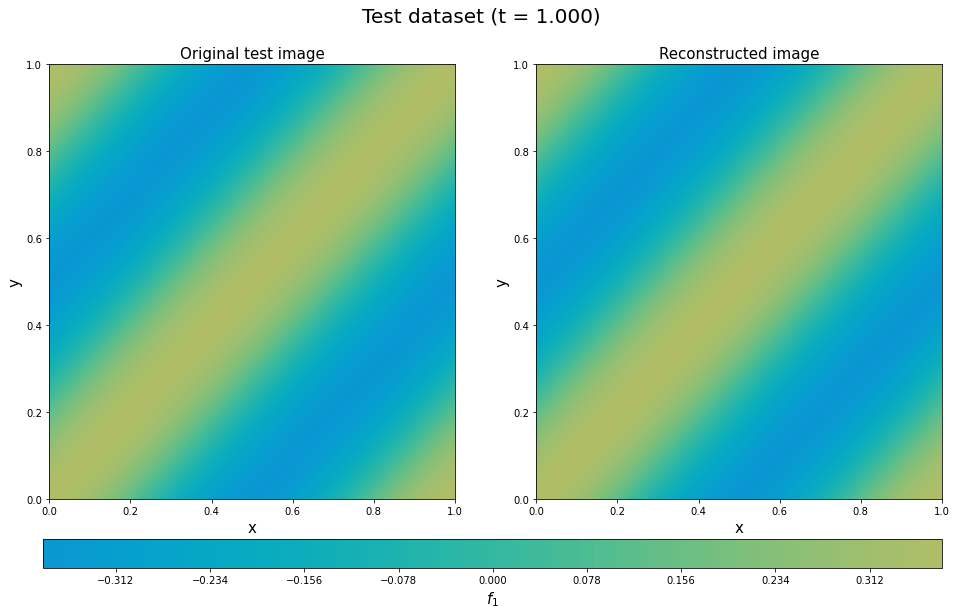

In [144]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

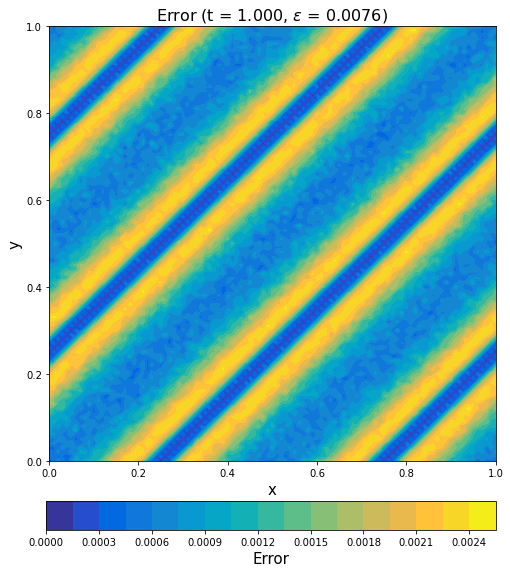

In [122]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate6, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [47]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [48]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [49]:
sensor2 = sensor2.reshape((41, 16, 1))

In [50]:
sensor2.shape

(41, 16, 1)

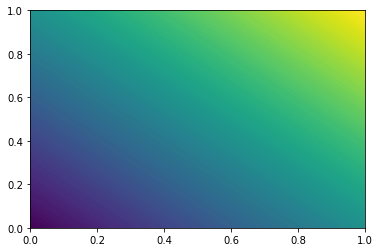

In [51]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [52]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(sensor2, out2, test_size=0.18, random_state=42)

In [123]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [53]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [54]:
np.savetxt('x_AF2.csv', sensor2.reshape((41, 16)), delimiter=",")
np.savetxt('y_AF2.csv', out2.reshape((41*101, 101)), delimiter=",")

In [55]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [56]:
start2 = datetime.datetime.now()
history2 = sd2.fit(x_train2, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 90ms/step - loss: 2.6905 - rmse: 1.6403
Epoch 2/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6817 - rmse: 1.6376
Epoch 3/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6732 - rmse: 1.6350
Epoch 4/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6647 - rmse: 1.6324
Epoch 5/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6562 - rmse: 1.6298
Epoch 6/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6477 - rmse: 1.6272
Epoch 7/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6392 - rmse: 1.6246
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.6309 - rmse: 1.6220
Epoch 9/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6226 - rmse: 1.6194
Epoch 10/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6144 - rmse: 1.6169
Epoch 11/10000
2/2 [===========================

2/2 [==============================] - 0s 7ms/step - loss: 1.4326 - rmse: 1.1969
Epoch 171/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4204 - rmse: 1.1917
Epoch 172/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4193 - rmse: 1.1913
Epoch 173/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.4098 - rmse: 1.1873
Epoch 174/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3996 - rmse: 1.1830
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3940 - rmse: 1.1806
Epoch 176/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3921 - rmse: 1.1798
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3810 - rmse: 1.1751
Epoch 178/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.3730 - rmse: 1.1717
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3717 - rmse: 1.1711
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.4398 - rmse: 0.6631
Epoch 339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4375 - rmse: 0.6614
Epoch 340/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.4355 - rmse: 0.6599
Epoch 341/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4261 - rmse: 0.6527
Epoch 342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4218 - rmse: 0.6494
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4224 - rmse: 0.6498
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4169 - rmse: 0.6456
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4119 - rmse: 0.6418
Epoch 346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4098 - rmse: 0.6401
Epoch 347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4045 - rmse: 0.6360
Epoch 348/10000
2/2 [=======================

2/2 [==============================] - 0s 9ms/step - loss: 0.0763 - rmse: 0.2761
Epoch 507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0715 - rmse: 0.2672
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0688 - rmse: 0.2622
Epoch 510/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0665 - rmse: 0.2577
Epoch 511/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0690 - rmse: 0.2625
Epoch 512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0697 - rmse: 0.2640
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0659 - rmse: 0.2566
Epoch 514/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0639 - rmse: 0.2528
Epoch 515/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0628 - rmse: 0.2504
Epoch 516/10000
2/2 [=====================

2/2 [==============================] - 0s 9ms/step - loss: 0.0109 - rmse: 0.1042
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0911
Epoch 677/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0918
Epoch 678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0114 - rmse: 0.1065
Epoch 679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.1142
Epoch 681/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 682/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0112 - rmse: 0.1058
Epoch 683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 684/10000
2/2 [=====================

2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0735
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 845/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0059 - rmse: 0.0764
Epoch 846/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 847/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0642
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 850/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 851/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 852/10000
2/2 [======================

2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 927/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 929/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1316e-04 - rmse: 0.0218
Epoch 930/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 931/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8870e-04 - rmse: 0.0234
Epoch 932/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0424e-04 - rmse: 0.0191
Epoch 933/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 934/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 935/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 936/10000
2/2 [============

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 1092/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 1093/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.3098e-04 - rmse: 0.0282
Epoch 1094/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 1095/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 1096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 1097/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1349e-04 - rmse: 0.0194
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5625e-04 - rmse: 0.0179
Epoch 1099/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6218e-04 - rmse: 0.0287
Epoch 1100/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 1101/10000
2

2/2 [==============================] - 0s 8ms/step - loss: 5.8845e-04 - rmse: 0.0236
Epoch 1256/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 1257/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 1258/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1216e-04 - rmse: 0.0241
Epoch 1259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 1260/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.3721e-04 - rmse: 0.0225
Epoch 1261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 1262/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7650e-04 - rmse: 0.0254
Epoch 1263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 1264/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 1265/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 1420/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 1421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 1422/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 1423/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 1424/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1121e-04 - rmse: 0.0168
Epoch 1425/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.2249e-04 - rmse: 0.0139
Epoch 1426/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2621e-04 - rmse: 0.0264
Epoch 1427/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 1428/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6921e-04 - rmse: 0.0118
Epoch 1429/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 1584/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 1585/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 1586/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.1117e-04 - rmse: 0.0136
Epoch 1587/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.3042e-05 - rmse: 0.0081
Epoch 1588/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 1589/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6758e-04 - rmse: 0.0290
Epoch 1590/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 1591/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.2114e-04 - rmse: 0.0097
Epoch 1592/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 1593/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1748/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 1749/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.2314e-04 - rmse: 0.0264
Epoch 1750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 1751/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 1752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 1753/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9936e-04 - rmse: 0.0218
Epoch 1754/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1968e-04 - rmse: 0.0263
Epoch 1755/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.7076e-04 - rmse: 0.0273
Epoch 1756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0768
Epoch 1757/10000
2/2

Epoch 1912/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 1913/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 1914/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 1915/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 1916/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 1917/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 1918/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 1919/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 1920/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 1921/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5348e-04 - rmse: 0.0114
Epoch 1922/10000

2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 2077/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7724e-04 - rmse: 0.0124
Epoch 2078/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.0797e-04 - rmse: 0.0262
Epoch 2079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 2080/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4882e-04 - rmse: 0.0269
Epoch 2081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 2082/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 2083/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0379
Epoch 2084/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2085/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.6252e-04 - rmse: 0.0290
Epoch 2086/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 2241/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 2242/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 2243/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 2244/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5067e-04 - rmse: 0.0181
Epoch 2245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 2246/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 2247/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9715e-04 - rmse: 0.0132
Epoch 2248/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.5219e-04 - rmse: 0.0230
Epoch 2249/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7558e-04 - rmse: 0.0159
Epoch 2250/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 7.9582e-04 - rmse: 0.0278
Epoch 2405/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 2406/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.3178e-04 - rmse: 0.0285
Epoch 2407/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 2408/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 2409/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 2410/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.6767e-05 - rmse: 0.0068
Epoch 2411/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 2412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 2413/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 2414/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 2569/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 2570/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 2571/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 2572/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 2573/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 2574/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4693e-04 - rmse: 0.0270
Epoch 2575/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 2576/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 2577/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0498e-04 - rmse: 0.0220
Epoch 2578/10000
2/2 [=======

Epoch 2733/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 2734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 2735/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 2736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 2737/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 2738/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 2739/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 2740/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 2741/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 2742/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 2743/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 6.9540e-04 - rmse: 0.0260
Epoch 2898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 2899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 2900/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1421e-04 - rmse: 0.0140
Epoch 2901/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 2902/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 2903/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.9586e-04 - rmse: 0.0218
Epoch 2904/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 2905/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 2906/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 2907/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 8.7890e-04 - rmse: 0.0293
Epoch 3062/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7641e-04 - rmse: 0.0257
Epoch 3063/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5871e-05 - rmse: 0.0076
Epoch 3064/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 3065/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 3066/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 3067/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 3068/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 3069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 3070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 3071/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 3145/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 3146/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 3147/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 3148/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 3149/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 3150/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 3151/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 3152/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 3153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 3154/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 7.0971e-04 - rmse: 0.0263
Epoch 3310/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.3959e-04 - rmse: 0.0149
Epoch 3311/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 3312/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.6322e-04 - rmse: 0.0234
Epoch 3313/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 3314/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.7112e-04 - rmse: 0.0213
Epoch 3315/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 3316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 3317/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 3318/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 3319/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 7.6346e-04 - rmse: 0.0273
Epoch 3474/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0318e-04 - rmse: 0.0221
Epoch 3475/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 3476/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 3477/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 3478/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 3479/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 3480/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 3481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 3482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0727
Epoch 3483/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 3557/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 3558/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 3559/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 3560/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 3561/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 3562/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 3563/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 3564/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 3565/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 3566/10000
2/2 [==============

2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 3722/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 3723/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8342e-04 - rmse: 0.0163
Epoch 3724/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 3725/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0737
Epoch 3726/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9324e-04 - rmse: 0.0166
Epoch 3727/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8396e-05 - rmse: 0.0056
Epoch 3728/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.9822e-04 - rmse: 0.0313
Epoch 3729/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.8536e-04 - rmse: 0.0217
Epoch 3730/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 3731/10000


Epoch 3886/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 3887/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 3888/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 3889/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0796
Epoch 3890/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 3891/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 3892/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0820
Epoch 3893/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 3894/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 3895/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 3896/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0666
Epoch 4052/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9232e-04 - rmse: 0.0166
Epoch 4053/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9316e-04 - rmse: 0.0133
Epoch 4054/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0141e-04 - rmse: 0.0242
Epoch 4055/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 4056/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7520e-04 - rmse: 0.0126
Epoch 4057/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.2824e-05 - rmse: 0.0088
Epoch 4058/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5387e-05 - rmse: 0.0089
Epoch 4059/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5930e-04 - rmse: 0.0211
Epoch 4060/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8916e-04 - rmse: 0.0132
Epoch

2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 4216/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 4217/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.6209e-05 - rmse: 0.0071
Epoch 4218/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 4219/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6695e-04 - rmse: 0.0123
Epoch 4220/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 4221/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 4222/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4054e-04 - rmse: 0.0112
Epoch 4223/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.4864e-04 - rmse: 0.0182
Epoch 4224/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 4225/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 4380/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 4381/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0731
Epoch 4382/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 4383/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6080e-04 - rmse: 0.0273
Epoch 4384/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 4385/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3147e-04 - rmse: 0.0248
Epoch 4386/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 4387/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 4388/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 4389/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 4545/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 4546/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 4547/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0588
Epoch 4548/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0761
Epoch 4549/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0603
Epoch 4550/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4551/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 4552/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 4553/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0911
Epoch 4554/10000
2/2 [==============

Epoch 4627/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 4628/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 4629/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 4630/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 4631/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 4632/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.0151e-04 - rmse: 0.0093
Epoch 4633/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 4634/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 4635/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 4636/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.2461e-04 - rmse: 0.0302
Epoch 4637/1

2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 4792/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 4793/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 4794/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0560
Epoch 4795/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.1320e-04 - rmse: 0.0300
Epoch 4796/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 4797/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 4798/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 4799/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 4800/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 4801/10000
2/2 [==========

2/2 [==============================] - 0s 8ms/step - loss: 2.8448e-04 - rmse: 0.0164
Epoch 4957/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 4958/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4959/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 4960/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 4961/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.6206e-04 - rmse: 0.0186
Epoch 4962/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 4963/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 4964/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 4965/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 4966/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 5121/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 5122/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 5123/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0715
Epoch 5124/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 5125/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5126/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 5127/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 5128/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 5129/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 5130/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 5.5917e-04 - rmse: 0.0233
Epoch 5285/10000
2/2 [==============================] - 0s 20ms/step - loss: 7.3085e-04 - rmse: 0.0268
Epoch 5286/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 5287/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3614e-04 - rmse: 0.0269
Epoch 5288/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 5289/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 5290/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 5291/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 5292/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 5293/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.6087e-04 - rmse: 0.0308
Epoch 5294/10000


Epoch 5367/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5368/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5003e-04 - rmse: 0.0289
Epoch 5369/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8696e-04 - rmse: 0.0193
Epoch 5370/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7976e-04 - rmse: 0.0238
Epoch 5371/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4928e-04 - rmse: 0.0271
Epoch 5372/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 5373/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2402e-04 - rmse: 0.0203
Epoch 5374/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3555e-04 - rmse: 0.0269
Epoch 5375/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0889
Epoch 5376/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.

2/2 [==============================] - 0s 7ms/step - loss: 4.4239e-04 - rmse: 0.0207
Epoch 5532/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 5533/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4800e-04 - rmse: 0.0116
Epoch 5534/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 5535/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 5536/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 5537/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 5538/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 5539/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 5540/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2691e-04 - rmse: 0.0177
Epoch 5541/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 5696/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 5697/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0833
Epoch 5698/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 5699/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2354e-04 - rmse: 0.0176
Epoch 5700/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2702e-04 - rmse: 0.0146
Epoch 5701/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 5702/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 5703/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2187e-04 - rmse: 0.0225
Epoch 5704/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 5705/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 3.2273e-04 - rmse: 0.0176
Epoch 5860/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 5861/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 5862/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 5863/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 5864/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.4729e-04 - rmse: 0.0252
Epoch 5865/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0770
Epoch 5866/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.4107e-04 - rmse: 0.0230
Epoch 5867/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 5868/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 5869/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 6024/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.5624e-04 - rmse: 0.0210
Epoch 6025/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 6026/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 6027/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.7812e-04 - rmse: 0.0258
Epoch 6028/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 6029/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 6030/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 6031/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 6032/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 6033/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 3.2320e-04 - rmse: 0.0176
Epoch 6189/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 6190/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.4214e-04 - rmse: 0.0151
Epoch 6191/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 6192/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 6193/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0465e-04 - rmse: 0.0096
Epoch 6194/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 6195/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 6196/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 6197/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 6198/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 6353/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 6354/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 6355/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 6356/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.1793e-04 - rmse: 0.0301
Epoch 6357/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5065e-04 - rmse: 0.0184
Epoch 6358/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0755
Epoch 6359/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.0399e-04 - rmse: 0.0299
Epoch 6360/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 6361/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 6362/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 2.7130e-04 - rmse: 0.0161
Epoch 6518/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 6519/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 6520/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2077e-04 - rmse: 0.0176
Epoch 6521/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 6522/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.7243e-04 - rmse: 0.0161
Epoch 6523/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 6524/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.4461e-04 - rmse: 0.0208
Epoch 6525/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0582
Epoch 6526/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.5391e-04 - rmse: 0.0307
Epoch 6527/100

2/2 [==============================] - 0s 7ms/step - loss: 7.8469e-04 - rmse: 0.0278
Epoch 6682/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.2820e-04 - rmse: 0.0248
Epoch 6683/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 6684/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 6685/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3876e-04 - rmse: 0.0287
Epoch 6686/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 6687/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 6688/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 6689/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 6690/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5714e-04 - rmse: 0.0273
Epoch 6691/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 6847/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 6848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 6849/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6850/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 6851/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0827
Epoch 6852/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 6853/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0659
Epoch 6854/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 6855/10000
2/2 [==============================] - 0s 20ms/step - loss: 4.3034e-04 - rmse: 0.0204
Epoch 6856/10000
2/2 [=========

2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 7011/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0729e-04 - rmse: 0.0199
Epoch 7012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 7013/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 7014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 7015/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3167e-04 - rmse: 0.0179
Epoch 7016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7017/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0595e-05 - rmse: 0.0069
Epoch 7018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7019/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 7020/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 7176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 7177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 7178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 7179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 7180/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.4963e-04 - rmse: 0.0184
Epoch 7181/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 7182/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.0558e-04 - rmse: 0.0222
Epoch 7183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0049 - rmse: 0.0699
Epoch 7184/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 7185/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 8.0478e-04 - rmse: 0.0281
Epoch 7340/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.9460e-05 - rmse: 0.0069
Epoch 7341/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7342/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5917e-04 - rmse: 0.0157
Epoch 7343/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 7344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 7345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 7346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 7347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7348/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.2815e-05 - rmse: 0.0078
Epoch 7349/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0825
Epoch 7504/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 7505/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 7506/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0066 - rmse: 0.0814
Epoch 7507/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0018 - rmse: 0.0429
Epoch 7508/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 7509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 7511/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 7512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 7513/10000
2/2 [=========

2/2 [==============================] - 0s 9ms/step - loss: 8.5552e-04 - rmse: 0.0290
Epoch 7668/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 7669/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 7670/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 7671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7672/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 7673/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 7674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 7675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 7676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 7677/10000
2/2 [===========

2/2 [==============================] - 0s 9ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 7833/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7834/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 7835/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 7836/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7837/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.9343e-04 - rmse: 0.0261
Epoch 7838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 7839/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.1785e-04 - rmse: 0.0266
Epoch 7840/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 7841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0783
Epoch 7842/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 7998/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 7999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0089 - rmse: 0.0945
Epoch 8000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0619
Epoch 8001/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0533
Epoch 8002/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0560
Epoch 8003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 8004/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 8005/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0493
Epoch 8006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 8007/10000
2/2 [==============

Epoch 8080/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0417
Epoch 8081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 8082/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8083/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.2162e-04 - rmse: 0.0284
Epoch 8084/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4990e-04 - rmse: 0.0154
Epoch 8085/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 8086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 8087/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 8088/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0635
Epoch 8089/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.3798e-05 - rmse: 0.0085
Epoch 80

2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 8245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0068 - rmse: 0.0824
Epoch 8246/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 8247/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 8248/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 8249/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8250/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 8251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 8252/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 8253/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 8254/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 8328/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0872e-04 - rmse: 0.0199
Epoch 8329/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.7829e-04 - rmse: 0.0238
Epoch 8330/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 8331/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 8332/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8745e-04 - rmse: 0.0278
Epoch 8333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 8334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 8335/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.1236e-04 - rmse: 0.0224
Epoch 8336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 8337/10000
2/

2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 8411/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 8412/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 8413/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 8414/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 8415/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 8416/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 8417/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 8418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 8419/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 8420/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 6.8198e-04 - rmse: 0.0259
Epoch 8494/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 8495/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8496/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9168e-04 - rmse: 0.0134
Epoch 8497/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 8498/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 8499/10000
2/2 [==============================] - 0s 22ms/step - loss: 4.9445e-04 - rmse: 0.0220
Epoch 8500/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 8501/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 8502/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0462
Epoch 8503/10000
2/

2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0428
Epoch 8658/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3540e-04 - rmse: 0.0111
Epoch 8659/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 8660/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 8661/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.5157e-04 - rmse: 0.0232
Epoch 8662/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 8663/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 8664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 8665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 8666/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.3078e-04 - rmse: 0.0205
Epoch 8667/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8823/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 8824/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6882e-04 - rmse: 0.0275
Epoch 8825/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.2596e-04 - rmse: 0.0267
Epoch 8826/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 8827/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 8828/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 8829/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8830/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 8831/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.9658e-04 - rmse: 0.0242
Epoch 8832/10000
2/2 [===

2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 8987/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 8988/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0523
Epoch 8989/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 8990/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4850e-04 - rmse: 0.0183
Epoch 8991/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 8992/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.3508e-04 - rmse: 0.0149
Epoch 8993/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8729e-04 - rmse: 0.0166
Epoch 8994/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 8995/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 8996/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 9.9781e-04 - rmse: 0.0314
Epoch 9151/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 9152/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.3580e-04 - rmse: 0.0229
Epoch 9153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 9154/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7190e-04 - rmse: 0.0190
Epoch 9155/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5074e-04 - rmse: 0.0272
Epoch 9156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 9157/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 9158/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.9585e-04 - rmse: 0.0169
Epoch 9159/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 9160/10000


2/2 [==============================] - 0s 7ms/step - loss: 5.5114e-04 - rmse: 0.0232
Epoch 9315/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 9316/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9317/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 9318/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9429e-04 - rmse: 0.0168
Epoch 9319/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 9320/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 9321/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 9322/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 9323/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5003e-04 - rmse: 0.0253
Epoch 9324/10000
2/2 [==

2/2 [==============================] - 0s 9ms/step - loss: 9.3927e-04 - rmse: 0.0305
Epoch 9398/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 9399/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7530e-04 - rmse: 0.0128
Epoch 9400/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 9401/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 9402/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 9403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 9404/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7654e-04 - rmse: 0.0311
Epoch 9405/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.4571e-04 - rmse: 0.0289
Epoch 9406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 9407/10000
2/2 

2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 9563/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 9564/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 9565/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 9566/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 9567/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 9568/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 9569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 9570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 9571/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 9572/10000
2/2 [==============

2/2 [==============================] - 0s 8ms/step - loss: 1.9742e-04 - rmse: 0.0136
Epoch 9646/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 9647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9648/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2590e-04 - rmse: 0.0107
Epoch 9649/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 9650/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1903e-04 - rmse: 0.0144
Epoch 9651/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.5342e-04 - rmse: 0.0272
Epoch 9652/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 9653/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2154e-04 - rmse: 0.0145
Epoch 9654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 9655/10000


2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 9810/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.1153e-04 - rmse: 0.0142
Epoch 9811/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 9812/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 9813/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 9814/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9815/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.8275e-04 - rmse: 0.0259
Epoch 9816/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0273e-04 - rmse: 0.0096
Epoch 9817/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 9818/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.1093e-04 - rmse: 0.0173
Epoch 9819/10000
2

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 9974/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 9975/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 9976/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 9977/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 9978/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 9979/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0089 - rmse: 0.0941
Epoch 9980/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 9981/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 9982/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 9983/10000
2/2 [==============

In [57]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:03:05.901788


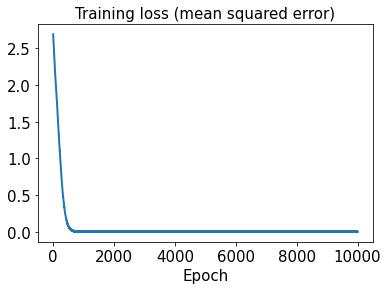

In [58]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

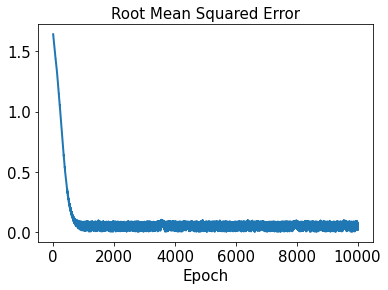

In [59]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [60]:
test_results2 = sd2.evaluate(x_test2)

1/1 [==============================] - 0s 85ms/step - loss: 1.0749e-05 - rmse: 0.0000e+00


In [61]:
decoded_train2 = sd2.predict(x_train2)

In [62]:
decoded_test2 = sd2.predict(x_test2)

In [63]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [64]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [65]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.035157452913227166


In [66]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.03655003018451534


In [67]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.01004101522225246, 0.07379123795920592, 0.0029245572314865295, 0.045320358243430774, 0.022365857812436322, 0.05843528230676269, 0.031729740892285495, 0.017417749773203584, 0.026970850057503083, 0.02644283506059806, 0.02371397596729268, 0.06228789404272071, 0.005344854208777337, 0.07855506701906027, 0.049528398426712195, 0.07513460016257406, 0.012299673701182092, 0.009581679009749525, 0.08212616568620537, 0.014533606595124548, 0.030528277804698366, 0.08388280505172131, 0.02911610155467835, 0.00503337560191985, 0.020867581997398712, 0.053888026947052275, 0.007779613285688425, 0.018730414593591614, 0.012528324974020018, 0.06797519403508097, 0.036639642298271026, 0.007722128833775151, 0.030978540843402194]


In [68]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.002406680237920946, 0.04117255053853203, 0.06378310078041605, 0.0007720746343499506, 0.08283716247147874, 0.03182957211824593, 0.01557798006951464, 0.03140823485236658]


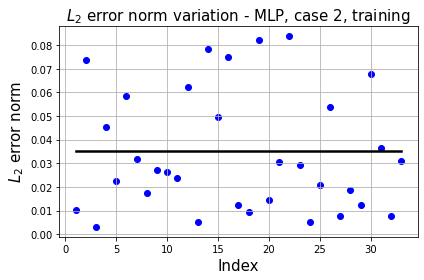

In [69]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

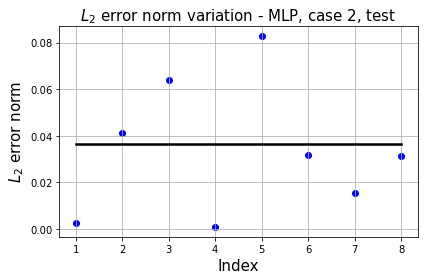

In [70]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

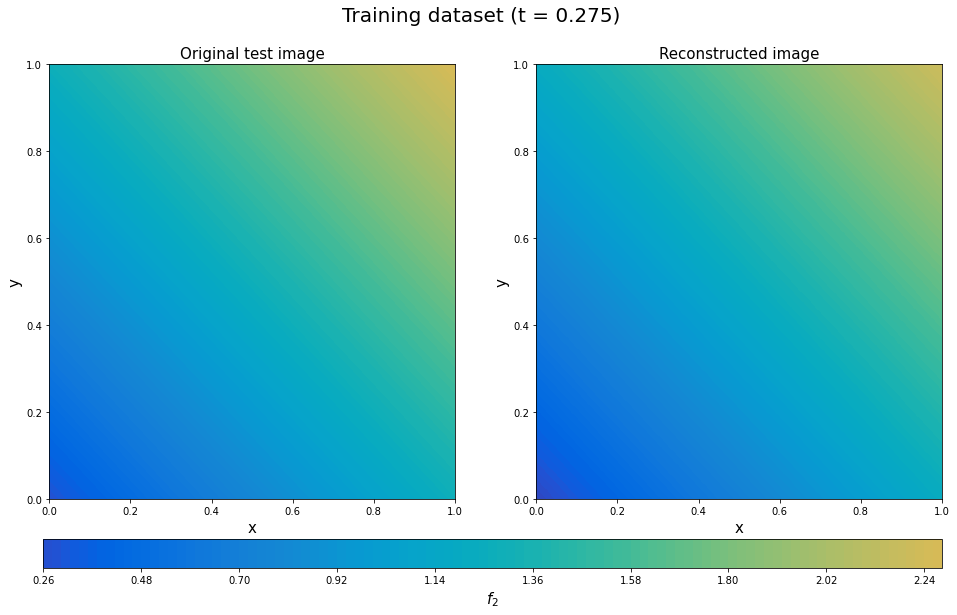

In [145]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

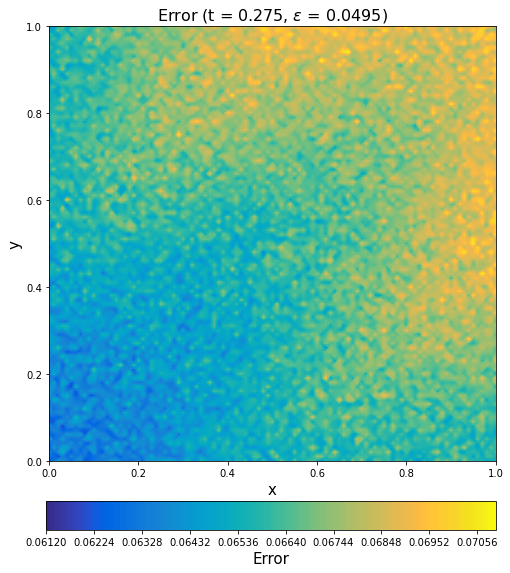

In [125]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

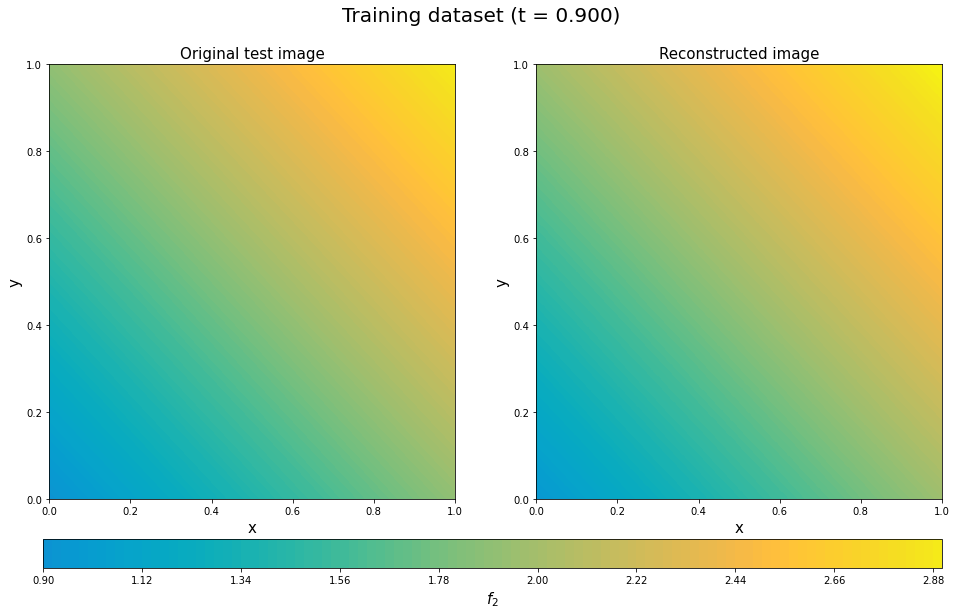

In [146]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

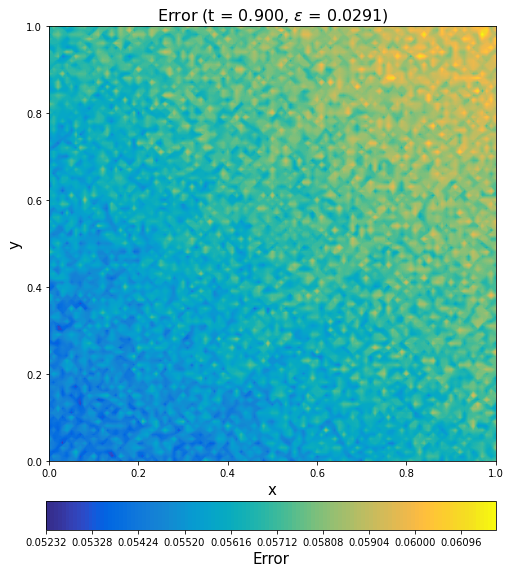

In [127]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

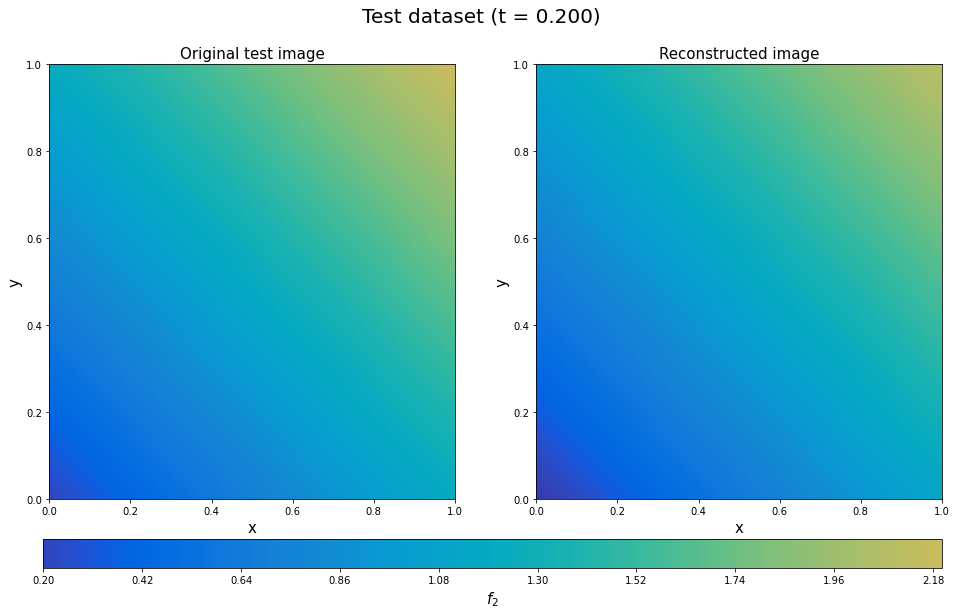

In [147]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

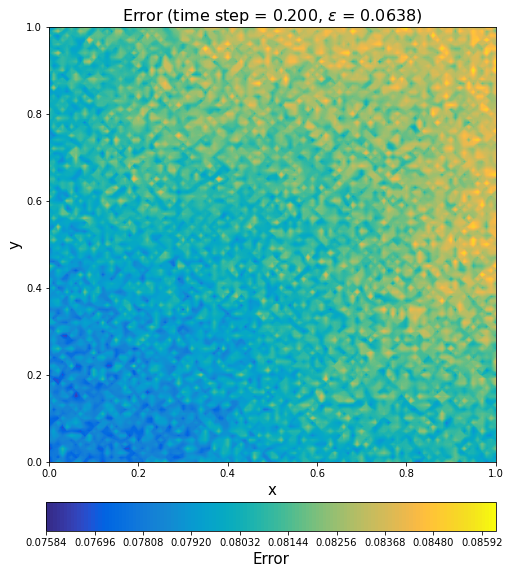

In [129]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

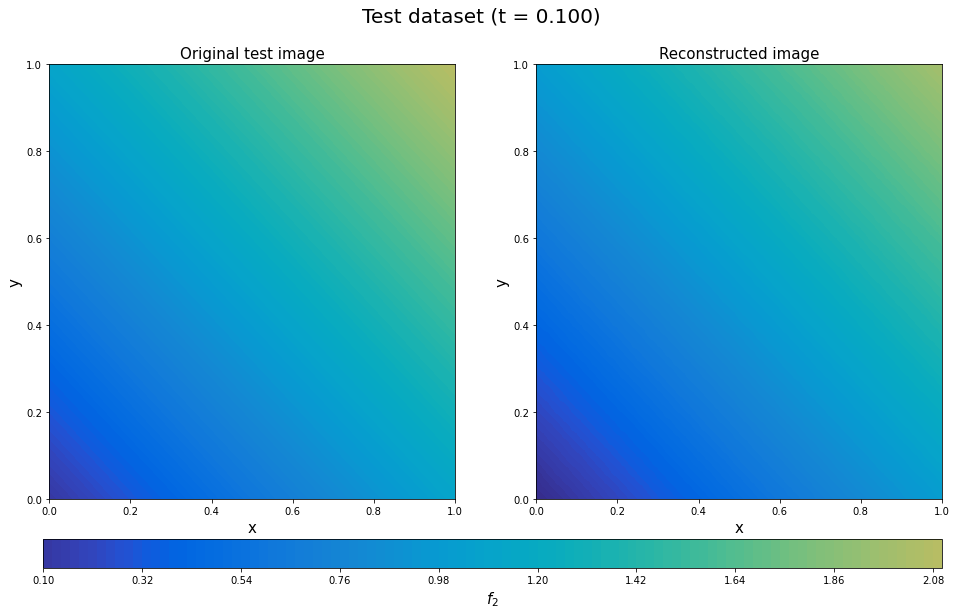

In [148]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

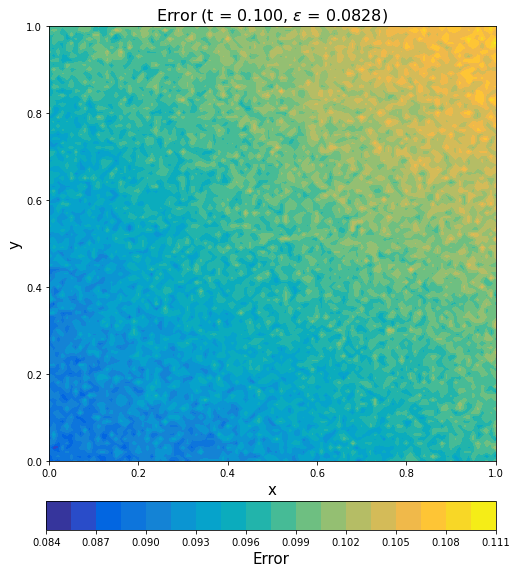

In [131]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [79]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [80]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [81]:
sensor3 = sensor3.reshape((41, 16, 1))

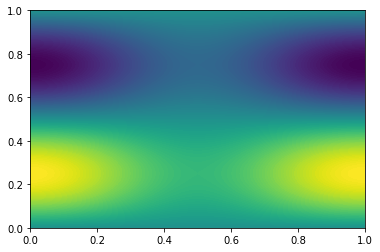

In [82]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [83]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(sensor3, out3, test_size=0.18, random_state=42)

In [84]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [85]:
np.savetxt('x_AF3.csv', sensor3.reshape((41, 16)), delimiter=",")
np.savetxt('y_AF3.csv', out3.reshape((41*101, 101)), delimiter=",")

In [86]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [87]:
start3 = datetime.datetime.now()
history3 = sd3.fit(x_train3, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 16ms/step - loss: 3.8337 - rmse: 1.9580
Epoch 2/10000
2/2 [==============================] - 0s 46ms/step - loss: 3.8128 - rmse: 1.9526
Epoch 3/10000
2/2 [==============================] - 0s 18ms/step - loss: 3.7919 - rmse: 1.9473
Epoch 4/10000
2/2 [==============================] - 0s 107ms/step - loss: 3.7709 - rmse: 1.9419
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7501 - rmse: 1.9365
Epoch 6/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7293 - rmse: 1.9311
Epoch 7/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7086 - rmse: 1.9258
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6881 - rmse: 1.9204
Epoch 9/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6676 - rmse: 1.9151
Epoch 10/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6473 - rmse: 1.9098
Epoch 11/10000
2/2 [======================

2/2 [==============================] - 0s 10ms/step - loss: 1.6420 - rmse: 1.2813
Epoch 171/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.6354 - rmse: 1.2787
Epoch 172/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.6334 - rmse: 1.2779
Epoch 173/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6247 - rmse: 1.2745
Epoch 174/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6156 - rmse: 1.2710
Epoch 175/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.6060 - rmse: 1.2672
Epoch 176/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.6011 - rmse: 1.2652
Epoch 177/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5943 - rmse: 1.2625
Epoch 178/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5852 - rmse: 1.2589
Epoch 179/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5779 - rmse: 1.2560
Epoch 180/10000
2/2 [=======================

2/2 [==============================] - 0s 7ms/step - loss: 0.8405 - rmse: 0.9166
Epoch 339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8381 - rmse: 0.9153
Epoch 340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8399 - rmse: 0.9163
Epoch 341/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8333 - rmse: 0.9127
Epoch 342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8301 - rmse: 0.9109
Epoch 343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8248 - rmse: 0.9080
Epoch 344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8255 - rmse: 0.9084
Epoch 345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.8192 - rmse: 0.9050
Epoch 346/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8155 - rmse: 0.9029
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.8165 - rmse: 0.9034
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.4484 - rmse: 0.6694
Epoch 507/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4489 - rmse: 0.6698
Epoch 508/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4520 - rmse: 0.6721
Epoch 509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4448 - rmse: 0.6667
Epoch 510/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4412 - rmse: 0.6640
Epoch 511/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4417 - rmse: 0.6644
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4420 - rmse: 0.6646
Epoch 513/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4369 - rmse: 0.6608
Epoch 514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4347 - rmse: 0.6591
Epoch 515/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.4329 - rmse: 0.6577
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 9ms/step - loss: 0.2302 - rmse: 0.4796
Epoch 675/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2251 - rmse: 0.4743
Epoch 676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2213 - rmse: 0.4702
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2202 - rmse: 0.4691
Epoch 678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2211 - rmse: 0.4700
Epoch 679/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2186 - rmse: 0.4673
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2202 - rmse: 0.4691
Epoch 681/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2249 - rmse: 0.4741
Epoch 682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2175 - rmse: 0.4662
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.2139 - rmse: 0.4623
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0915 - rmse: 0.3023
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0932 - rmse: 0.3051
Epoch 844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0927 - rmse: 0.3042
Epoch 845/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0902 - rmse: 0.3002
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0908 - rmse: 0.3012
Epoch 847/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0970 - rmse: 0.3112
Epoch 848/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0952 - rmse: 0.3084
Epoch 849/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0882 - rmse: 0.2968
Epoch 850/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0901 - rmse: 0.2999
Epoch 851/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0895 - rmse: 0.2990
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0331 - rmse: 0.1816
Epoch 1011/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0333 - rmse: 0.1821
Epoch 1012/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0313 - rmse: 0.1765
Epoch 1013/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0313 - rmse: 0.1765
Epoch 1014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0387 - rmse: 0.1966
Epoch 1015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0321 - rmse: 0.1790
Epoch 1016/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0312 - rmse: 0.1763
Epoch 1017/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0300 - rmse: 0.1728
Epoch 1018/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0299 - rmse: 0.1726
Epoch 1019/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0313 - rmse: 0.1768
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.1043
Epoch 1177/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0103 - rmse: 0.1011
Epoch 1178/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0107 - rmse: 0.1031
Epoch 1179/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0108 - rmse: 0.1037
Epoch 1180/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0133 - rmse: 0.1148
Epoch 1181/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0123 - rmse: 0.1104
Epoch 1182/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0119 - rmse: 0.1087
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0115 - rmse: 0.1068
Epoch 1184/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0179 - rmse: 0.1336
Epoch 1185/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0114 - rmse: 0.1063
Epoch 1186/10000
2/2 [==============

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 1343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0116 - rmse: 0.1072
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0713
Epoch 1345/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0729
Epoch 1346/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 1347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 1348/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 1349/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 1351/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 1352/10000
2/2 [==============

2/2 [==============================] - 0s 7ms/step - loss: 8.1163e-04 - rmse: 0.0274
Epoch 1509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0633
Epoch 1510/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 1511/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.5760e-04 - rmse: 0.0282
Epoch 1512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0996
Epoch 1513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 1514/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8896e-04 - rmse: 0.0270
Epoch 1515/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 1516/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 1517/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1901e-04 - rmse: 0.0256
Epoch 1518/10000
2/2 

Epoch 1673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 1674/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7219e-04 - rmse: 0.0178
Epoch 1675/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7100e-04 - rmse: 0.0177
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 1677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 1678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 1679/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 1680/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 1681/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 1682/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 1683/1

2/2 [==============================] - 0s 9ms/step - loss: 7.0434e-04 - rmse: 0.0255
Epoch 1838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 1839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 1840/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 1841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0101 - rmse: 0.1000
Epoch 1842/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0924
Epoch 1843/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 1844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 1845/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6904e-04 - rmse: 0.0286
Epoch 1846/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 1847/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 3.1468e-04 - rmse: 0.0163
Epoch 2002/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5362e-04 - rmse: 0.0201
Epoch 2003/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5301e-04 - rmse: 0.0101
Epoch 2004/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.8480e-04 - rmse: 0.0183
Epoch 2005/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7931e-04 - rmse: 0.0114
Epoch 2006/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 2007/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 2008/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 2010/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 2011/1000

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 2166/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 2167/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.1122e-04 - rmse: 0.0191
Epoch 2168/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 2169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 2170/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 2171/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0421
Epoch 2172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 2174/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.7548e-04 - rmse: 0.0230
Epoch 2175/10000
2/2 [=======

2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 2330/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 2331/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.9279e-04 - rmse: 0.0157
Epoch 2332/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9522e-04 - rmse: 0.0187
Epoch 2333/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 2334/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 2335/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 2336/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.2786e-04 - rmse: 0.0220
Epoch 2337/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0918
Epoch 2338/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 2339/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 9.2831e-04 - rmse: 0.0297
Epoch 2494/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 2495/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3745e-04 - rmse: 0.0097
Epoch 2496/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.9779e-04 - rmse: 0.0275
Epoch 2497/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.1230e-04 - rmse: 0.0277
Epoch 2498/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 2499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 2500/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 2501/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 2502/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 2503/10000
2/2 

2/2 [==============================] - 0s 14ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 2658/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1016e-04 - rmse: 0.0130
Epoch 2659/10000
2/2 [==============================] - 0s 18ms/step - loss: 8.4118e-05 - rmse: 0.0065
Epoch 2660/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 2661/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 2662/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 2663/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 2664/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1591e-04 - rmse: 0.0193
Epoch 2665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0896
Epoch 2666/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 2667/10000
2/

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 2822/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4179e-04 - rmse: 0.0200
Epoch 2823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 2824/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 2825/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 2826/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.0951e-04 - rmse: 0.0192
Epoch 2827/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 2828/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 2829/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 2830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 2831/10000
2/2 [=======

2/2 [==============================] - 0s 9ms/step - loss: 4.6842e-04 - rmse: 0.0207
Epoch 2986/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.0359e-04 - rmse: 0.0191
Epoch 2987/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 2988/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 2989/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 2990/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 2991/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 2992/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.8421e-04 - rmse: 0.0211
Epoch 2993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 2994/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 2995/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 1.0147e-04 - rmse: 0.0081
Epoch 3150/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.5683e-04 - rmse: 0.0110
Epoch 3151/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.6540e-04 - rmse: 0.0207
Epoch 3152/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2953e-04 - rmse: 0.0096
Epoch 3153/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 3154/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 3155/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 3156/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2353e-04 - rmse: 0.0169
Epoch 3157/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2724e-04 - rmse: 0.0095
Epoch 3158/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 3159/10

2/2 [==============================] - 0s 7ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 3314/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 3315/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 3316/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 3317/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5641e-04 - rmse: 0.0205
Epoch 3318/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 3319/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 3320/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1624e-04 - rmse: 0.0090
Epoch 3321/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 3322/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 3323/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 3478/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 3479/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8611e-04 - rmse: 0.0159
Epoch 3480/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.4291e-04 - rmse: 0.0302
Epoch 3481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 3482/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.3927e-04 - rmse: 0.0246
Epoch 3483/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 3484/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6424e-04 - rmse: 0.0182
Epoch 3485/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 3486/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6461e-04 - rmse: 0.0231
Epoch 3487/100

2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 3643/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 3644/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 3645/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0066 - rmse: 0.0809
Epoch 3646/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0087 - rmse: 0.0929
Epoch 3647/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0716
Epoch 3648/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 3649/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 3650/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0711
Epoch 3651/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.3504e-04 - rmse: 0.0246
Epoch 3652/10000
2/2 [===========

Epoch 3725/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3755e-04 - rmse: 0.0104
Epoch 3726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 3727/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 3728/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 3729/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 3730/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 3731/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.5061e-04 - rmse: 0.0205
Epoch 3732/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.0254e-04 - rmse: 0.0193
Epoch 3733/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.9743e-04 - rmse: 0.0258
Epoch 3734/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0033 - rmse: 0.0572
Ep

2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 3891/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 3892/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 3893/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 3894/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 3895/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 3896/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0550
Epoch 3897/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 3898/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 3899/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0717
Epoch 3900/10000
2/2 [=============

2/2 [==============================] - 0s 7ms/step - loss: 2.9055e-04 - rmse: 0.0162
Epoch 4055/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 4056/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.5157e-04 - rmse: 0.0229
Epoch 4057/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.7008e-04 - rmse: 0.0156
Epoch 4058/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 4059/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6319e-04 - rmse: 0.0154
Epoch 4060/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 4061/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 4062/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3057e-04 - rmse: 0.0143
Epoch 4063/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 4064/100

2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 4219/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 4220/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 4221/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 4222/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 4223/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 4224/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 4225/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 4226/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 4227/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 4228/10000
2/2 [==============

2/2 [==============================] - 0s 7ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 4384/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4351e-04 - rmse: 0.0205
Epoch 4385/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 4386/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.6060e-04 - rmse: 0.0184
Epoch 4387/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.3458e-04 - rmse: 0.0106
Epoch 4388/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 4389/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 4390/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 4391/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.5026e-04 - rmse: 0.0288
Epoch 4392/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 4393/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 7.0466e-04 - rmse: 0.0261
Epoch 4548/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 4549/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 4550/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7897e-04 - rmse: 0.0214
Epoch 4551/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 4552/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 4553/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 4554/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 4555/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 4556/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 4557/10000
2/2 [======

2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 4712/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.5403e-04 - rmse: 0.0289
Epoch 4713/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2131e-04 - rmse: 0.0101
Epoch 4714/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 4715/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 4716/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 4717/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 4718/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 4719/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 4720/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1066e-04 - rmse: 0.0171
Epoch 4721/10000
2/2 [==

2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 4876/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 4877/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0032e-04 - rmse: 0.0241
Epoch 4878/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3721e-04 - rmse: 0.0249
Epoch 4879/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 4880/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0087 - rmse: 0.0931
Epoch 4881/10000
2/2 [==============================] - 0s 9ms/step - loss: 9.0186e-04 - rmse: 0.0297
Epoch 4882/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 4883/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 4884/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 4885/10000
2/2 [=

2/2 [==============================] - 0s 8ms/step - loss: 5.4684e-05 - rmse: 0.0060
Epoch 5040/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2912e-04 - rmse: 0.0145
Epoch 5041/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0039 - rmse: 0.0626
Epoch 5042/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5043/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 5044/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5615e-04 - rmse: 0.0184
Epoch 5045/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2501e-04 - rmse: 0.0144
Epoch 5046/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0627
Epoch 5047/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0666
Epoch 5048/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 5049/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 5205/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 5206/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 5207/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 5208/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.0299e-04 - rmse: 0.0092
Epoch 5209/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 5210/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 5211/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 5212/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8570e-04 - rmse: 0.0130
Epoch 5213/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 5214/10000
2/2 [=====

2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 5288/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0764
Epoch 5289/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 5290/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 5291/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 5292/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 5293/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 5294/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 5295/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 5296/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 5297/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 5453/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 5454/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.9585e-04 - rmse: 0.0219
Epoch 5455/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 5456/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 5457/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5632e-04 - rmse: 0.0184
Epoch 5458/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0678
Epoch 5459/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 5460/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 5461/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 5462/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 3.5149e-04 - rmse: 0.0183
Epoch 5617/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.9787e-05 - rmse: 0.0086
Epoch 5618/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 5619/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 5620/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 5621/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.2336e-04 - rmse: 0.0103
Epoch 5622/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 5623/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 5624/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 5625/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5626/10000
2/2

2/2 [==============================] - 0s 7ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 5781/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.8886e-04 - rmse: 0.0239
Epoch 5782/10000
2/2 [==============================] - 0s 7ms/step - loss: 8.2871e-04 - rmse: 0.0285
Epoch 5783/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0928
Epoch 5784/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 5785/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.7251e-04 - rmse: 0.0275
Epoch 5786/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.6858e-04 - rmse: 0.0235
Epoch 5787/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.6230e-04 - rmse: 0.0291
Epoch 5788/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 5789/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.5305e-04 - rmse: 0.0209
Epoch 5790/1

2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 5945/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 5946/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.5891e-04 - rmse: 0.0273
Epoch 5947/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 5948/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 5949/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.7436e-04 - rmse: 0.0214
Epoch 5950/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 5951/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 5952/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 5953/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 5954/10000
2/2 [=======

2/2 [==============================] - 0s 7ms/step - loss: 3.0138e-04 - rmse: 0.0169
Epoch 6109/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 6110/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 6111/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 6112/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6113/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6114/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 6115/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.3912e-04 - rmse: 0.0180
Epoch 6116/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.0673e-04 - rmse: 0.0171
Epoch 6117/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 6118/10000
2/2 [===

2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 6192/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 6193/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 6194/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 6195/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 6196/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6197/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 6198/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 6199/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 6200/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 6201/10000
2/2 [==========

2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 6275/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 6276/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0034 - rmse: 0.0586
Epoch 6277/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 6278/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 6279/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 6280/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 6281/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 6282/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 6283/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 6284/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 6358/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3704e-04 - rmse: 0.0110
Epoch 6359/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.4940e-04 - rmse: 0.0208
Epoch 6360/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 6361/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 6362/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 6363/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.2979e-04 - rmse: 0.0177
Epoch 6364/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 6365/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 6366/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.0147e-04 - rmse: 0.0093
Epoch 6367/10000
2/2 

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 6522/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 6523/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 6524/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 6525/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.4446e-04 - rmse: 0.0207
Epoch 6526/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 6527/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.1763e-05 - rmse: 0.0075
Epoch 6528/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 6529/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 6530/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 6531/10000
2/2 [=======

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 6686/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 6687/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 6688/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.6118e-04 - rmse: 0.0234
Epoch 6689/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1882e-04 - rmse: 0.0201
Epoch 6690/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.7714e-04 - rmse: 0.0162
Epoch 6691/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 6692/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 6693/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.9405e-04 - rmse: 0.0195
Epoch 6694/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 6695/10000
2/2 

2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 6850/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 6851/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.5182e-04 - rmse: 0.0271
Epoch 6852/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 6853/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 6854/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.2930e-05 - rmse: 0.0069
Epoch 6855/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 6856/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.2208e-04 - rmse: 0.0144
Epoch 6857/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 6858/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0540
Epoch 6859/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 7014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 7015/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 7016/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0050 - rmse: 0.0709
Epoch 7017/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 7018/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7019/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 7020/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0681
Epoch 7021/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0923
Epoch 7022/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 7023/10000
2/2 [===========

2/2 [==============================] - 0s 7ms/step - loss: 2.2437e-04 - rmse: 0.0145
Epoch 7178/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 7179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 7181/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4898e-04 - rmse: 0.0183
Epoch 7182/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.1759e-04 - rmse: 0.0174
Epoch 7183/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 7184/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 7185/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 7186/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 7187/10000
2/2 [==

2/2 [==============================] - 0s 8ms/step - loss: 0.0106 - rmse: 0.1028
Epoch 7342/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 7343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 7345/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7346/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 7347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 7348/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 7349/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7350/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.8164e-04 - rmse: 0.0277
Epoch 7351/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 3.5883e-04 - rmse: 0.0186
Epoch 7506/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.7609e-04 - rmse: 0.0257
Epoch 7507/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 7508/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 7509/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.2953e-04 - rmse: 0.0204
Epoch 7510/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0625
Epoch 7511/10000
2/2 [==============================] - 0s 7ms/step - loss: 7.4275e-04 - rmse: 0.0270
Epoch 7512/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 7513/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 7514/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7515/10000
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 2.3752e-04 - rmse: 0.0150
Epoch 7670/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.2474e-04 - rmse: 0.0105
Epoch 7671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 7672/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.1778e-04 - rmse: 0.0201
Epoch 7673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 7674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 7675/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 7677/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 7678/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7679/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 7834/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0774e-04 - rmse: 0.0139
Epoch 7835/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 7836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 7837/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 7838/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 7839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0501
Epoch 7840/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7841/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.8798e-05 - rmse: 0.0074
Epoch 7842/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 7843/10000
2/2 [=======

2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 7998/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 7999/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 8000/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 8001/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 8002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 8003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 8004/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 8005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 8006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 8007/10000
2/2 [==============

2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8162/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0083 - rmse: 0.0909
Epoch 8163/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 8164/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 8165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 8166/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 8167/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 8168/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0083 - rmse: 0.0912
Epoch 8169/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 8170/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 8171/10000
2/2 [==============

2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 8326/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9176e-04 - rmse: 0.0134
Epoch 8327/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 8328/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5815e-04 - rmse: 0.0156
Epoch 8329/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 8330/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 8332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 8333/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4261e-04 - rmse: 0.0151
Epoch 8334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 8335/10000
2/2 [=

2/2 [==============================] - 0s 7ms/step - loss: 3.9041e-04 - rmse: 0.0194
Epoch 8490/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.9666e-05 - rmse: 0.0075
Epoch 8491/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 8492/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9647e-04 - rmse: 0.0135
Epoch 8493/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0503
Epoch 8494/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.6928e-04 - rmse: 0.0189
Epoch 8495/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 8496/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 8497/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0332
Epoch 8498/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8516e-04 - rmse: 0.0165
Epoch 8499/10000


2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 8655/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 8656/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 8657/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0010 - rmse: 0.0321
Epoch 8658/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 8659/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0017 - rmse: 0.0416
Epoch 8660/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 8661/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.7805e-04 - rmse: 0.0294
Epoch 8662/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 8663/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 8664/10000
2/2 [===========

2/2 [==============================] - 0s 8ms/step - loss: 9.5245e-04 - rmse: 0.0307
Epoch 8738/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.8127e-04 - rmse: 0.0311
Epoch 8739/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 8740/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 8741/10000
2/2 [==============================] - 0s 8ms/step - loss: 9.7996e-04 - rmse: 0.0311
Epoch 8742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 8743/10000
2/2 [==============================] - 0s 7ms/step - loss: 9.0623e-04 - rmse: 0.0299
Epoch 8744/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 8745/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.8134e-04 - rmse: 0.0238
Epoch 8746/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 8747/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 8902/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.1334e-04 - rmse: 0.0300
Epoch 8903/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0585
Epoch 8904/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 8905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0802
Epoch 8906/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 8907/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 8908/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 8909/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 8911/10000
2/2 [=========

2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9066/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 9067/10000
2/2 [==============================] - 0s 8ms/step - loss: 8.0280e-05 - rmse: 0.0082
Epoch 9068/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.4649e-04 - rmse: 0.0116
Epoch 9069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 9070/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 9071/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 9072/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 9073/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 9074/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.8887e-04 - rmse: 0.0240
Epoch 9075/10000
2/2 [===

2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 9230/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.3944e-04 - rmse: 0.0113
Epoch 9231/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0353
Epoch 9232/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.6790e-04 - rmse: 0.0160
Epoch 9233/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0095 - rmse: 0.0974
Epoch 9234/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0488
Epoch 9235/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4273e-04 - rmse: 0.0152
Epoch 9236/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 9237/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9238/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.6758e-04 - rmse: 0.0160
Epoch 9239/10000
2/2

2/2 [==============================] - 0s 8ms/step - loss: 8.4968e-04 - rmse: 0.0289
Epoch 9394/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 9395/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 9396/10000
2/2 [==============================] - 0s 8ms/step - loss: 6.0680e-04 - rmse: 0.0244
Epoch 9397/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 9398/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.6321e-04 - rmse: 0.0212
Epoch 9399/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 9400/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 9401/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5205e-04 - rmse: 0.0155
Epoch 9402/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.2480e-04 - rmse: 0.0177
Epoch 9403/10000


2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 9558/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 9559/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 9560/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.8909e-04 - rmse: 0.0194
Epoch 9561/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 9562/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 9563/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.4733e-04 - rmse: 0.0183
Epoch 9564/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0541
Epoch 9565/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1364e-04 - rmse: 0.0142
Epoch 9566/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 9567/10000
2/2 [===

2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 9723/10000
2/2 [==============================] - 0s 7ms/step - loss: 5.1111e-04 - rmse: 0.0223
Epoch 9724/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 9725/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 9726/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 9727/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 9728/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 9729/10000
2/2 [==============================] - 0s 8ms/step - loss: 4.1677e-04 - rmse: 0.0201
Epoch 9730/10000
2/2 [==============================] - 0s 8ms/step - loss: 5.4527e-04 - rmse: 0.0231
Epoch 9731/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0580
Epoch 9732/10000
2/2 [===

2/2 [==============================] - 0s 9ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 9887/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0899
Epoch 9888/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6914e-04 - rmse: 0.0214
Epoch 9889/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9890/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0048e-05 - rmse: 0.0043
Epoch 9891/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 9892/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 9893/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.6141e-04 - rmse: 0.0274
Epoch 9894/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.3362e-05 - rmse: 0.0056
Epoch 9895/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 9896/10000

In [88]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:03:04.448531


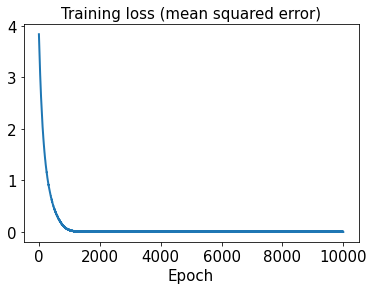

In [89]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

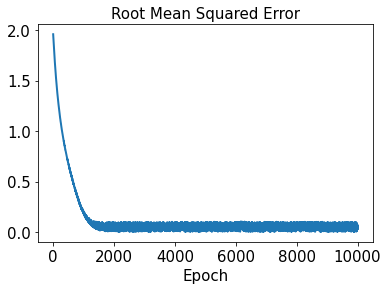

In [90]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [91]:
test_results3 = sd3.evaluate(x_test3)

1/1 [==============================] - 0s 86ms/step - loss: 1.1768e-05 - rmse: 0.0000e+00


In [92]:
decoded_train3 = sd3.predict(x_train3)

In [93]:
decoded_test3 = sd3.predict(x_test3)

In [94]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [95]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [96]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.0860740640066255


In [97]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.0863863765555704


In [98]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.07589646546771053, 0.08968197001407406, 0.04876087383506119, 0.05543610294034248, 0.023081481686057777, 0.07318496254850815, 0.036399719246603346, 0.10522940020069799, 0.029787260620729113, 0.13688177185706565, 0.1260637922085928, 0.11922021277371557, 0.057565988024524825, 0.09491543087077936, 0.06149543372536826, 0.11459795506493459, 0.08542543249259171, 0.009540412866649667, 0.10985910330408387, 0.09520144205280355, 0.15935172617995433, 0.10500107332506917, 0.14797557349359097, 0.023883085668763945, 0.11551509571462777, 0.067411133133986, 0.016276641024931416, 0.016379218129024133, 0.006274732007874869, 0.08431784336087254, 0.042885675787280426, 0.06661099777268516, 0.17101726004543596]


In [99]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.03189486028243075, 0.04923264234917787, 0.07881963062937693, 0.04019964337198343, 0.10002069868896903, 0.19524489370516315, 0.010060655853080806, 0.18297913676505306]


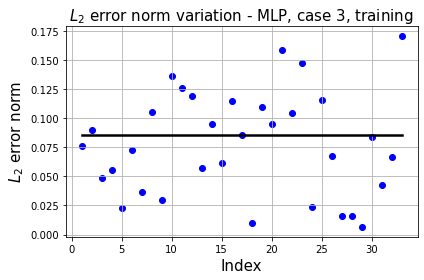

In [100]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

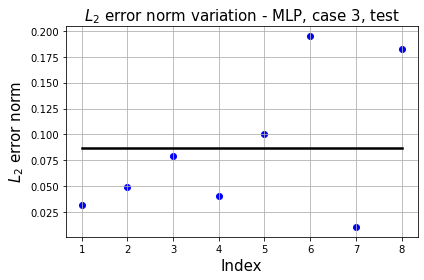

In [101]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

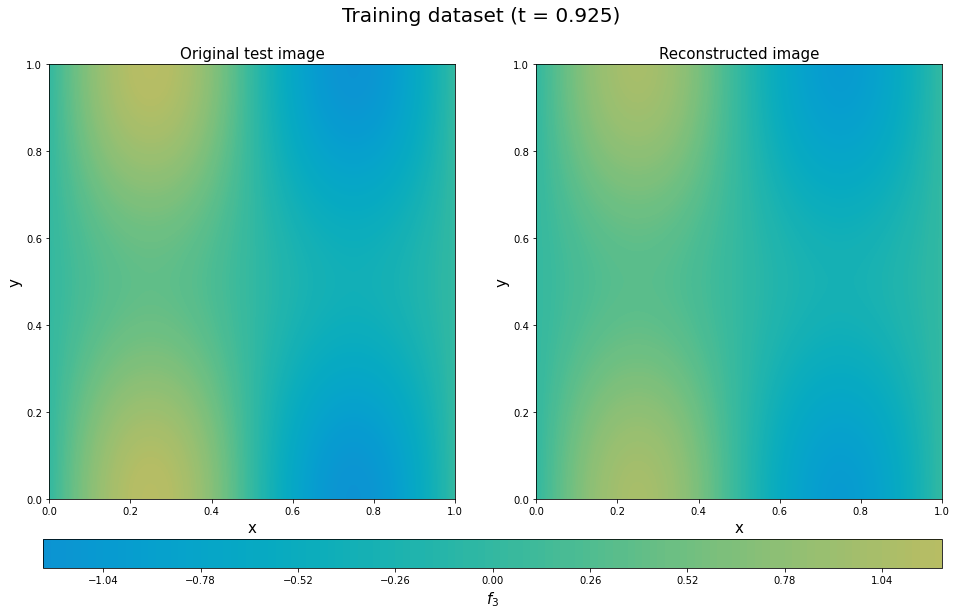

In [149]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

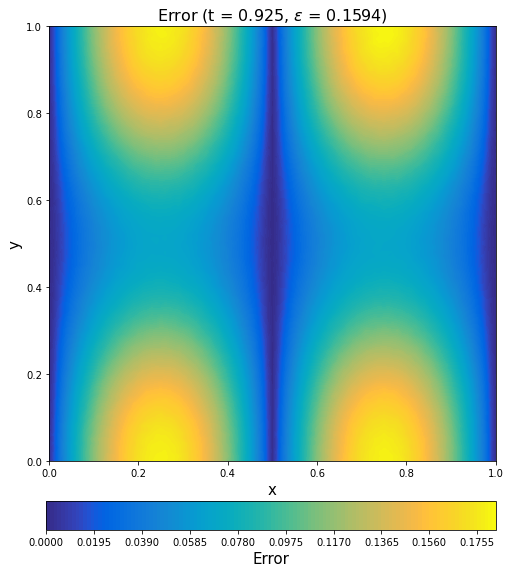

In [136]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

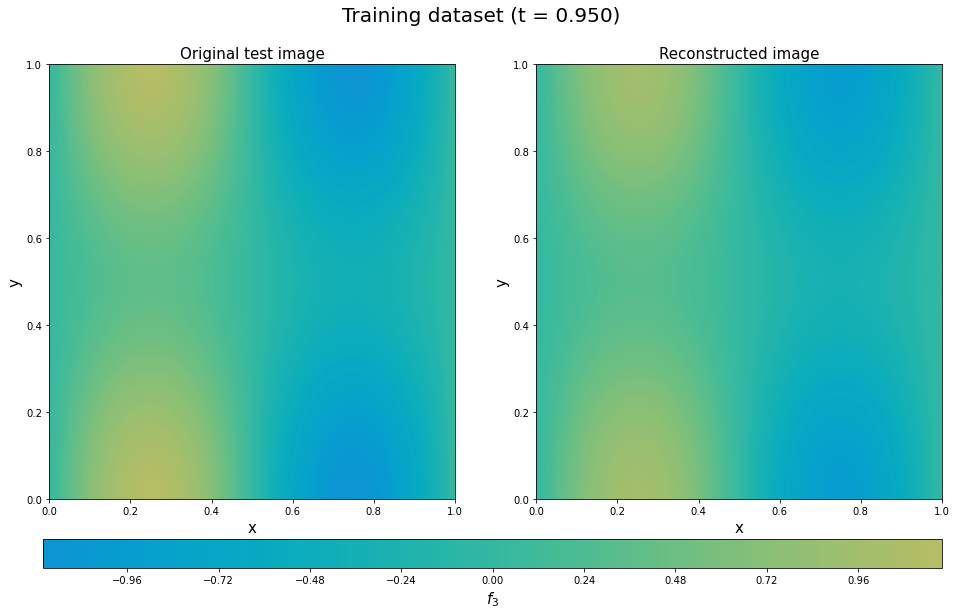

In [150]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

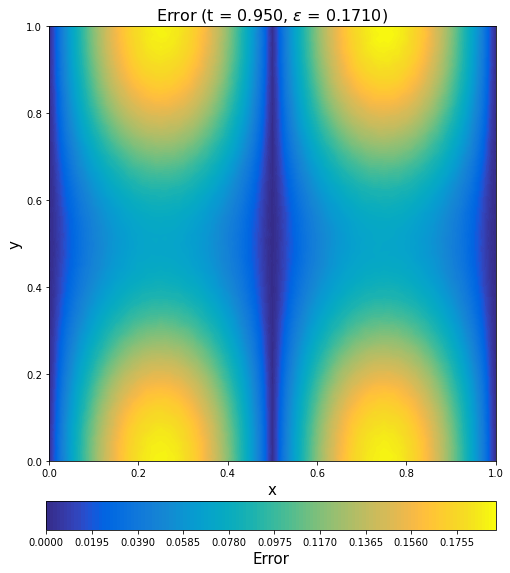

In [135]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

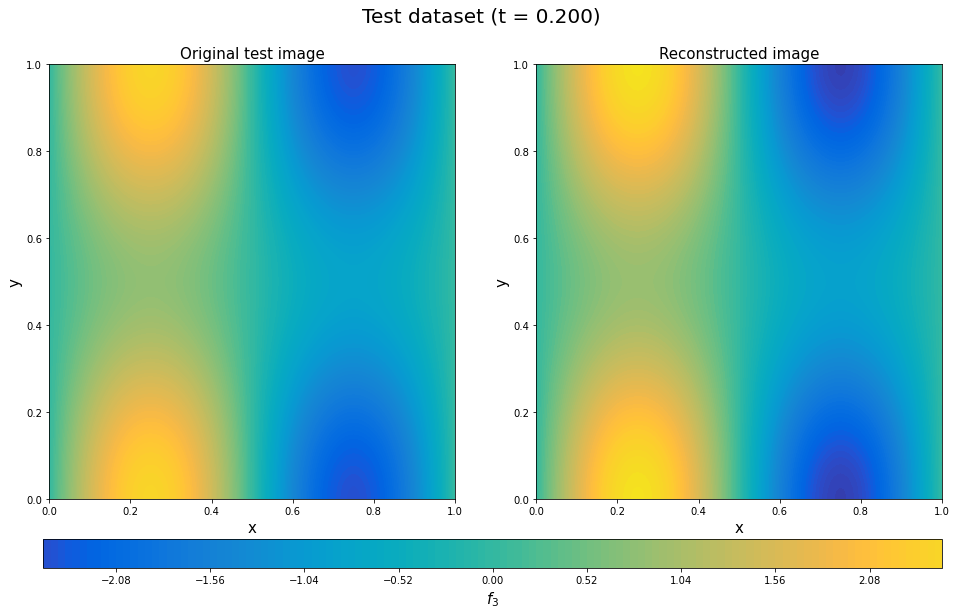

In [153]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

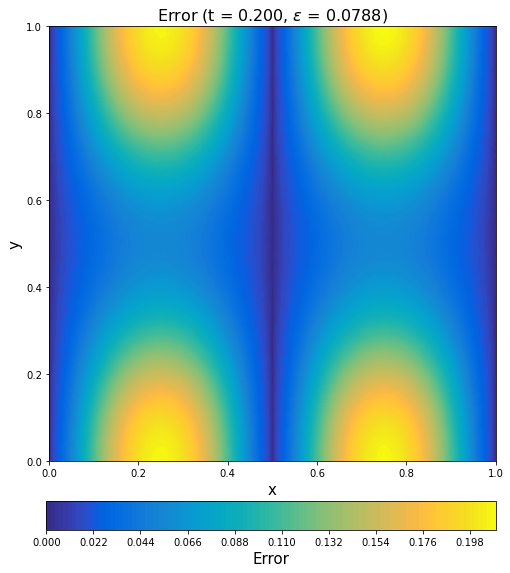

In [155]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

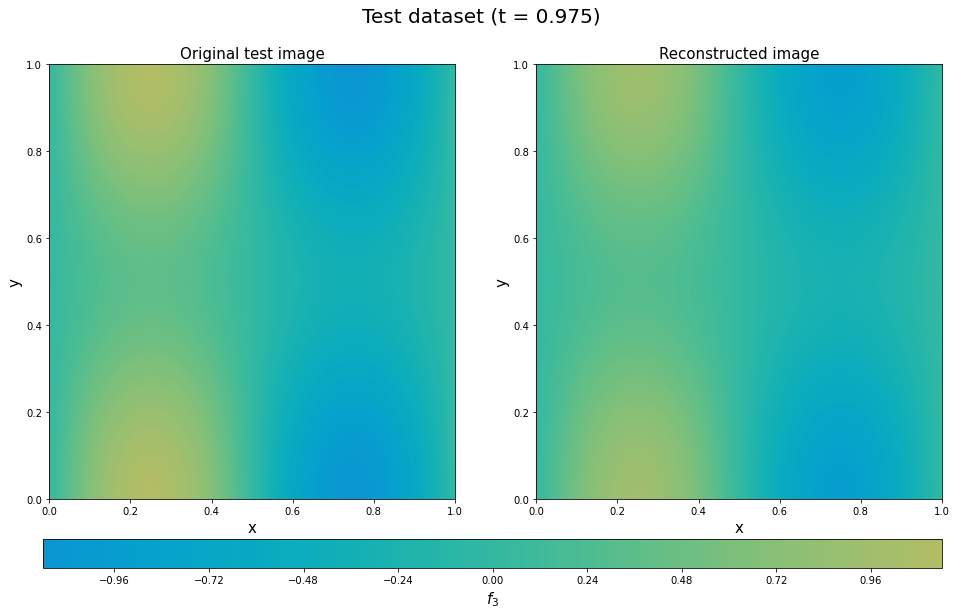

In [152]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

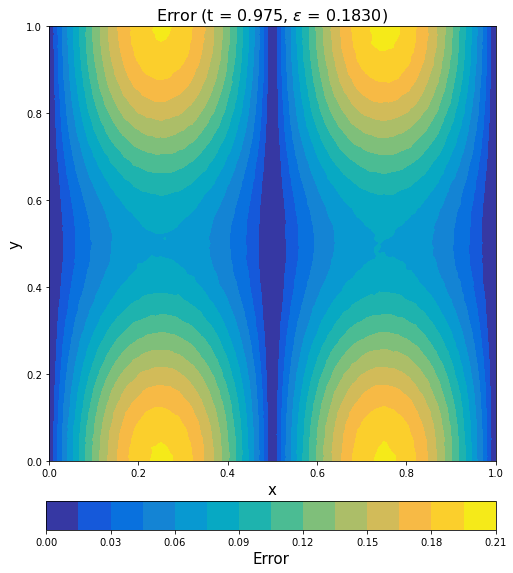

In [140]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()